In [3]:
import astropy
from gpz_pype import utilities
from astropy.table import Table
from subprocess import call
import subprocess
from astropy.io import fits
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

In [131]:
soft = utilities.basic_lupt_soft
lups = utilities.flux_to_lupt

In [132]:
hdul =fits.open('jwst_full_matched_catalogues.fits')
data=hdul[1].data
hdul.close()
#hdu =fits.open('jwst_full_matched_catalogues.fits',mode='update')
#table = Table(hdu[1].data)
#hdu.close()
cols = hdul[1].columns
name=[]
name_err=[]
index=[]
indexerr=[]
other=[]
index_other=[]
for i in range(len(cols)):
    if cols.names[i].endswith('flux_aper_0'):
        name.append(str(cols.names[i]))
        index.append(i)
    elif cols.names[i].endswith('fluxerr_aper_0'):
        name_err.append(str(cols.names[i]))
        indexerr.append(i)
    elif cols.names[i].endswith('flux_aper_1'):
        name.append(str(cols.names[i]))
        index.append(i)
    elif cols.names[i].endswith('fluxerr_aper_1'):
        name_err.append(str(cols.names[i]))
        indexerr.append(i)
    elif cols.names[i].endswith('flux_aper_2'):
        name.append(str(cols.names[i]))
        index.append(i)
    elif cols.names[i].endswith('fluxerr_aper_2'):
        name_err.append(str(cols.names[i]))
        indexerr.append(i)
    elif cols.names[i].endswith('flux_aper_3'):
        name.append(str(cols.names[i]))
        index.append(i)
    elif cols.names[i].endswith('fluxerr_aper_3'):
        name_err.append(str(cols.names[i]))
        indexerr.append(i)
    else:
        other.append(cols.names[i])
        index_other.append(i)

for j in range(len(other)):
    if other[j]=='field_2':
        stop=j
other_cut=[]
for i in range(0,stop):
    other_cut.append(other[i])
    
    
    

In [133]:
for i in range(len(cols.names)):
    if cols.names[i]=='z_spec':
        print(i)
print(cols.formats[942])
#print(data[942])
zspec=np.array((data['z_spec']))

942
D


In [134]:
data_other=[]
for i in range(len(other)):
    data_other.append(np.array(data[f'{other[i]}']))


In [135]:
formats=[]
formats_err=[]
other_formats=[]
for i in index:
    formats.append(str(cols.formats[i]))
for j in indexerr:
    formats_err.append(str(cols.formats[j]))
for k in index_other:
    other_formats.append(cols.formats[k])
#print(other_formats)

In [136]:
b=[]
for j in range(len(name)):    
    flux=np.array(data[f'{name[j]}'])*u.uJy    
    flux_err=np.array(data[f'{name_err[j]}'])*u.uJy
    b.append(soft(flux,flux_err,unit=u.uJy, f0=3631 * u.Jy, scale=1.05))
print(b)

[6.332943436681897e-14, 2.2742882839362388e-12, 8.397713542267533e-13, 1.1852378605975402e-12, nan, nan, nan, nan, nan, nan, nan, nan, 1.521398520850294e-12, 2.099836623197425e-12, 2.8625761235974663e-12, 3.935267932178675e-12, 2.2151357358733814e-12, 2.902707720125284e-12, 2.4192391482017518e-12, 3.162125063560701e-12, 1.6045464250246525e-12, 2.7223928909855922e-12, 3.88551290884579e-12, 4.5914457882630444e-12, 1.489460283906128e-12, 1.8113044893235307e-12, 2.2572942898044424e-12, 3.5701702798253493e-12, 4.224325155110012e-13, 5.838414094412968e-13, 8.18510977118504e-13, 1.1679786358404267e-12, 2.3949627629906943e-12, 1.7279928286312716e-12, 1.9622895565072278e-12, 2.8022119059902585e-12, 4.271436780224449e-12, 5.86093306358392e-12, 8.121822065288655e-12, 1.1602870451228039e-11, 3.1583390850978383e-13, 4.388263124707946e-13, 6.100733828297731e-13, 8.325549618002735e-13, 7.831295603200875e-13, 1.0871379286955978e-12, 1.5260822261085967e-12, 2.1878791229746152e-12, 1.2507476252918097e-1

/home/jo_shepton/miniconda3/envs/py3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [137]:

lup_flux=[]
for k in range(len(name)):
    print(name[k],name_err[k])
    print(np.array(data[f'{name[k]}']),np.array(data[f'{name_err[k]}']))
    flux=np.array(data[f'{name[k]}'])
    flux_err=np.array(data[f'{name_err[k]}'])
    soft = b[k]

    lup_flux.append(lups(np.array(data[f'{name[k]}']),np.array(data[f'{name_err[k]}']),b[k]))
    
    
#print(lup_flux[27][0])
#lup_flux0[0][0] = lups, lup_flux0[0][1]=lups_err

flux_aper_0 fluxerr_aper_0
[0.73746943 0.04213639 0.04401861 ... 0.2453739  6.37959356 1.30585826] [0.00216556 0.0292168  0.0129504  ... 0.0012772  0.00568897 0.00265449]
flux_aper_1 fluxerr_aper_1
[1.13694603 0.06620698 0.07203616 ... 0.40692587 9.23738349 1.73511099] [0.0030888  0.03522284 0.01522495 ... 0.00168107 0.006869   0.00311399]
flux_aper_2 fluxerr_aper_2
[ 1.58957213  0.10232522  0.12354304 ...  0.64785795 13.03487687
  2.24130567] [0.03209419 0.03900311 0.01802387 ... 0.0021959  0.00820739 0.00363156]
flux_aper_3 fluxerr_aper_3
[ 2.04482096  0.14762542  0.20622357 ...  0.99289892 17.65841443
  3.00817004] [0.0410879  0.04195574 0.01976258 ... 0.00287754 0.00962474 0.00435127]
clearp-f430m_flux_aper_0 clearp-f430m_fluxerr_aper_0
[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]
clearp-f430m_flux_aper_1 clearp-f430m_fluxerr_aper_1
[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]
clearp-f430m_flux_aper_2 clearp-f430m_fluxerr_aper_2
[nan nan nan ... nan na

f210m-clear_flux_aper_0 f210m-clear_fluxerr_aper_0
[       nan 0.07677907 0.05645271 ...        nan        nan        nan] [       nan 0.03539024 0.01149168 ...        nan        nan        nan]
f210m-clear_flux_aper_1 f210m-clear_fluxerr_aper_1
[       nan 0.11572774 0.09964977 ...        nan        nan        nan] [       nan 0.03918682 0.0148856  ...        nan        nan        nan]
f210m-clear_flux_aper_2 f210m-clear_fluxerr_aper_2
[       nan 0.17153717 0.16600898 ...        nan        nan        nan] [       nan 0.04242132 0.01880212 ...        nan        nan        nan]
f210m-clear_flux_aper_3 f210m-clear_fluxerr_aper_3
[       nan 0.25518398 0.25164159 ...        nan        nan        nan] [       nan 0.04507859 0.02261029 ...        nan        nan        nan]
f277w-clear_flux_aper_0 f277w-clear_fluxerr_aper_0
[       nan        nan        nan ... 0.28864045 5.67035822 0.73836085] [       nan        nan        nan ... 0.00190306 0.00554903 0.0026236 ]
f277w-clear_flux_aper_1 f

f850lpu_flux_aper_3 f850lpu_fluxerr_aper_3
[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]


In [9]:
a=[]
a_err=[]
other_col=[]
file = open('column_names.txt','w+')
for i in range(1,stop):
    other_col.append('col'+str(i))
for i in range(stop,(2*len(lup_flux)+stop),2):
    a.append('col'+str(i))
for i in range(stop+1,(2*len(lup_flux)+1+stop),2):
    a_err.append('col'+str(i))
    
for i in range(len(other_col)):
    file.write(str(other_col[i])+',')

for i in range(len(a)):
    file.write(str(a[i])+',')
for i in range(len(a_err)):
    file.write(str(a_err[i])+',')
file.close()    

In [10]:
print(len(a),len(a_err))

140 140


In [11]:
lup_cols=[]
lup_cols_err=[]
other_cols=[]
file = open('catalogue_columns_luptitudes', 'w') 

for i in range(len(a)):
        lup_cols.append(f'{a[i]}=fits.Column(name="{name[i]}",format ="{formats[i]}",array=lup_flux{[i]}[0])')
        lup_cols_err.append(f'{a_err[i]}=fits.Column(name="{name_err[i]}",format ="{formats[i]}",array=lup_flux{[i]}[1])')

for i in range(0,stop-1):
    other_cols.append(f'{other_col[i]}=fits.Column(name="{other[i]}",format ="{other_formats[i]}",array=data_other{[i]})')
    file.write(str(other_cols[i]+'\n'))
    #lup_cols_err.append(name={name_err[i]}, format='D', array={lup_flux[i][1]})
for j in range(len(lup_cols)):

    file.write(str(lup_cols[j])+'\n')
    
    file.write(str(lup_cols_err[j])+'\n')
file.close()
    

In [12]:
print(lup_cols[0],lup_cols_err[0])

col511=fits.Column(name="flux_aper_0",format ="D",array=lup_flux[0][0]) col512=fits.Column(name="fluxerr_aper_0",format ="D",array=lup_flux[0][1])


In [13]:
tst=[]
for k in range(0,140):
    tst.append(str(f'lup_flux{[k]}[0]'))
print(tst)

['lup_flux[0][0]', 'lup_flux[1][0]', 'lup_flux[2][0]', 'lup_flux[3][0]', 'lup_flux[4][0]', 'lup_flux[5][0]', 'lup_flux[6][0]', 'lup_flux[7][0]', 'lup_flux[8][0]', 'lup_flux[9][0]', 'lup_flux[10][0]', 'lup_flux[11][0]', 'lup_flux[12][0]', 'lup_flux[13][0]', 'lup_flux[14][0]', 'lup_flux[15][0]', 'lup_flux[16][0]', 'lup_flux[17][0]', 'lup_flux[18][0]', 'lup_flux[19][0]', 'lup_flux[20][0]', 'lup_flux[21][0]', 'lup_flux[22][0]', 'lup_flux[23][0]', 'lup_flux[24][0]', 'lup_flux[25][0]', 'lup_flux[26][0]', 'lup_flux[27][0]', 'lup_flux[28][0]', 'lup_flux[29][0]', 'lup_flux[30][0]', 'lup_flux[31][0]', 'lup_flux[32][0]', 'lup_flux[33][0]', 'lup_flux[34][0]', 'lup_flux[35][0]', 'lup_flux[36][0]', 'lup_flux[37][0]', 'lup_flux[38][0]', 'lup_flux[39][0]', 'lup_flux[40][0]', 'lup_flux[41][0]', 'lup_flux[42][0]', 'lup_flux[43][0]', 'lup_flux[44][0]', 'lup_flux[45][0]', 'lup_flux[46][0]', 'lup_flux[47][0]', 'lup_flux[48][0]', 'lup_flux[49][0]', 'lup_flux[50][0]', 'lup_flux[51][0]', 'lup_flux[52][0]', 'l

In [ ]:
#col1=fits.Column(name='flux_aper_0',format ='D',array=lup_flux[0][0])

In [25]:
col1=fits.Column(name="field_1",format ="18A",array=data_other[0])
col2=fits.Column(name="id_1",format ="J",array=data_other[1])
col3=fits.Column(name="thresh",format ="D",array=data_other[2])
col4=fits.Column(name="npix",format ="K",array=data_other[3])
col5=fits.Column(name="tnpix",format ="K",array=data_other[4])
col6=fits.Column(name="xmin",format ="K",array=data_other[5])
col7=fits.Column(name="xmax",format ="K",array=data_other[6])
col8=fits.Column(name="ymin",format ="K",array=data_other[7])
col9=fits.Column(name="ymax",format ="K",array=data_other[8])
col10=fits.Column(name="x",format ="D",array=data_other[9])
col11=fits.Column(name="y",format ="D",array=data_other[10])
col12=fits.Column(name="x2_image",format ="D",array=data_other[11])
col13=fits.Column(name="y2_image",format ="D",array=data_other[12])
col14=fits.Column(name="xy_image",format ="D",array=data_other[13])
col15=fits.Column(name="errx2",format ="D",array=data_other[14])
col16=fits.Column(name="erry2",format ="D",array=data_other[15])
col17=fits.Column(name="errxy",format ="D",array=data_other[16])
col18=fits.Column(name="a_image",format ="D",array=data_other[17])
col19=fits.Column(name="b_image",format ="D",array=data_other[18])
col20=fits.Column(name="theta_image",format ="D",array=data_other[19])
col21=fits.Column(name="cxx_image",format ="D",array=data_other[20])
col22=fits.Column(name="cyy_image",format ="D",array=data_other[21])
col23=fits.Column(name="cxy_image",format ="D",array=data_other[22])
col24=fits.Column(name="cflux",format ="D",array=data_other[23])
col25=fits.Column(name="flux",format ="D",array=data_other[24])
col26=fits.Column(name="cpeak",format ="D",array=data_other[25])
col27=fits.Column(name="peak",format ="D",array=data_other[26])
col28=fits.Column(name="xcpeak",format ="K",array=data_other[27])
col29=fits.Column(name="ycpeak",format ="K",array=data_other[28])
col30=fits.Column(name="xpeak",format ="K",array=data_other[29])
col31=fits.Column(name="ypeak",format ="K",array=data_other[30])
col32=fits.Column(name="flag",format ="K",array=data_other[31])
col33=fits.Column(name="x_image",format ="D",array=data_other[32])
col34=fits.Column(name="y_image",format ="D",array=data_other[33])
col35=fits.Column(name="number",format ="J",array=data_other[34])
col36=fits.Column(name="ra_1",format ="D",array=data_other[35])
col37=fits.Column(name="dec_1",format ="D",array=data_other[36])
col38=fits.Column(name="x_world",format ="D",array=data_other[37])
col39=fits.Column(name="y_world",format ="D",array=data_other[38])
col40=fits.Column(name="flux_iso",format ="D",array=data_other[39])
col41=fits.Column(name="fluxerr_iso",format ="D",array=data_other[40])
col42=fits.Column(name="area_iso",format ="K",array=data_other[41])
col43=fits.Column(name="mag_iso",format ="D",array=data_other[42])
col44=fits.Column(name="kron_radius_1",format ="D",array=data_other[43])
col45=fits.Column(name="kron_rcirc",format ="D",array=data_other[44])
col46=fits.Column(name="flux_auto",format ="D",array=data_other[45])
col47=fits.Column(name="fluxerr_auto",format ="D",array=data_other[46])
col48=fits.Column(name="bkg_auto",format ="D",array=data_other[47])
col49=fits.Column(name="flag_auto",format ="K",array=data_other[48])
col50=fits.Column(name="area_auto",format ="D",array=data_other[49])
col51=fits.Column(name="flux_radius_flag",format ="I",array=data_other[50])
col52=fits.Column(name="flux_radius_20",format ="D",array=data_other[51])
col53=fits.Column(name="flux_radius",format ="D",array=data_other[52])
col54=fits.Column(name="flux_radius_90",format ="D",array=data_other[53])
col55=fits.Column(name="tot_corr",format ="D",array=data_other[54])
col56=fits.Column(name="mag_auto",format ="D",array=data_other[55])
col57=fits.Column(name="magerr_auto",format ="D",array=data_other[56])
col58=fits.Column(name="flag_aper_0",format ="I",array=data_other[57])
col59=fits.Column(name="bkg_aper_0",format ="D",array=data_other[58])
col60=fits.Column(name="mask_aper_0",format ="D",array=data_other[59])
col61=fits.Column(name="flag_aper_1",format ="I",array=data_other[60])
col62=fits.Column(name="bkg_aper_1",format ="D",array=data_other[61])
col63=fits.Column(name="mask_aper_1",format ="D",array=data_other[62])
col64=fits.Column(name="flag_aper_2",format ="I",array=data_other[63])
col65=fits.Column(name="bkg_aper_2",format ="D",array=data_other[64])
col66=fits.Column(name="mask_aper_2",format ="D",array=data_other[65])
col67=fits.Column(name="flag_aper_3",format ="I",array=data_other[66])
col68=fits.Column(name="bkg_aper_3",format ="D",array=data_other[67])
col69=fits.Column(name="mask_aper_3",format ="D",array=data_other[68])
col70=fits.Column(name="clearp-f430m_flag_aper_0",format ="I",array=data_other[69])
col71=fits.Column(name="clearp-f430m_bkg_aper_0",format ="D",array=data_other[70])
col72=fits.Column(name="clearp-f430m_mask_aper_0",format ="D",array=data_other[71])
col73=fits.Column(name="clearp-f430m_flag_aper_1",format ="I",array=data_other[72])
col74=fits.Column(name="clearp-f430m_bkg_aper_1",format ="D",array=data_other[73])
col75=fits.Column(name="clearp-f430m_mask_aper_1",format ="D",array=data_other[74])
col76=fits.Column(name="clearp-f430m_flag_aper_2",format ="I",array=data_other[75])
col77=fits.Column(name="clearp-f430m_bkg_aper_2",format ="D",array=data_other[76])
col78=fits.Column(name="clearp-f430m_mask_aper_2",format ="D",array=data_other[77])
col79=fits.Column(name="clearp-f430m_flag_aper_3",format ="I",array=data_other[78])
col80=fits.Column(name="clearp-f430m_bkg_aper_3",format ="D",array=data_other[79])
col81=fits.Column(name="clearp-f430m_mask_aper_3",format ="D",array=data_other[80])
col82=fits.Column(name="clearp-f430m_tot_corr",format ="D",array=data_other[81])
col83=fits.Column(name="clearp-f480m_flag_aper_0",format ="I",array=data_other[82])
col84=fits.Column(name="clearp-f480m_bkg_aper_0",format ="D",array=data_other[83])
col85=fits.Column(name="clearp-f480m_mask_aper_0",format ="D",array=data_other[84])
col86=fits.Column(name="clearp-f480m_flag_aper_1",format ="I",array=data_other[85])
col87=fits.Column(name="clearp-f480m_bkg_aper_1",format ="D",array=data_other[86])
col88=fits.Column(name="clearp-f480m_mask_aper_1",format ="D",array=data_other[87])
col89=fits.Column(name="clearp-f480m_flag_aper_2",format ="I",array=data_other[88])
col90=fits.Column(name="clearp-f480m_bkg_aper_2",format ="D",array=data_other[89])
col91=fits.Column(name="clearp-f480m_mask_aper_2",format ="D",array=data_other[90])
col92=fits.Column(name="clearp-f480m_flag_aper_3",format ="I",array=data_other[91])
col93=fits.Column(name="clearp-f480m_bkg_aper_3",format ="D",array=data_other[92])
col94=fits.Column(name="clearp-f480m_mask_aper_3",format ="D",array=data_other[93])
col95=fits.Column(name="clearp-f480m_tot_corr",format ="D",array=data_other[94])
col96=fits.Column(name="f090w-clear_flag_aper_0",format ="I",array=data_other[95])
col97=fits.Column(name="f090w-clear_bkg_aper_0",format ="D",array=data_other[96])
col98=fits.Column(name="f090w-clear_mask_aper_0",format ="D",array=data_other[97])
col99=fits.Column(name="f090w-clear_flag_aper_1",format ="I",array=data_other[98])
col100=fits.Column(name="f090w-clear_bkg_aper_1",format ="D",array=data_other[99])
col101=fits.Column(name="f090w-clear_mask_aper_1",format ="D",array=data_other[100])
col102=fits.Column(name="f090w-clear_flag_aper_2",format ="I",array=data_other[101])
col103=fits.Column(name="f090w-clear_bkg_aper_2",format ="D",array=data_other[102])
col104=fits.Column(name="f090w-clear_mask_aper_2",format ="D",array=data_other[103])
col105=fits.Column(name="f090w-clear_flag_aper_3",format ="I",array=data_other[104])
col106=fits.Column(name="f090w-clear_bkg_aper_3",format ="D",array=data_other[105])
col107=fits.Column(name="f090w-clear_mask_aper_3",format ="D",array=data_other[106])
col108=fits.Column(name="f090w-clear_tot_corr",format ="D",array=data_other[107])
col109=fits.Column(name="f105w_flag_aper_0",format ="I",array=data_other[108])
col110=fits.Column(name="f105w_bkg_aper_0",format ="D",array=data_other[109])
col111=fits.Column(name="f105w_mask_aper_0",format ="D",array=data_other[110])
col112=fits.Column(name="f105w_flag_aper_1",format ="I",array=data_other[111])
col113=fits.Column(name="f105w_bkg_aper_1",format ="D",array=data_other[112])
col114=fits.Column(name="f105w_mask_aper_1",format ="D",array=data_other[113])
col115=fits.Column(name="f105w_flag_aper_2",format ="I",array=data_other[114])
col116=fits.Column(name="f105w_bkg_aper_2",format ="D",array=data_other[115])
col117=fits.Column(name="f105w_mask_aper_2",format ="D",array=data_other[116])
col118=fits.Column(name="f105w_flag_aper_3",format ="I",array=data_other[117])
col119=fits.Column(name="f105w_bkg_aper_3",format ="D",array=data_other[118])
col120=fits.Column(name="f105w_mask_aper_3",format ="D",array=data_other[119])
col121=fits.Column(name="f105w_tot_corr",format ="D",array=data_other[120])
col122=fits.Column(name="f110w_flag_aper_0",format ="I",array=data_other[121])
col123=fits.Column(name="f110w_bkg_aper_0",format ="D",array=data_other[122])
col124=fits.Column(name="f110w_mask_aper_0",format ="D",array=data_other[123])
col125=fits.Column(name="f110w_flag_aper_1",format ="I",array=data_other[124])
col126=fits.Column(name="f110w_bkg_aper_1",format ="D",array=data_other[125])
col127=fits.Column(name="f110w_mask_aper_1",format ="D",array=data_other[126])
col128=fits.Column(name="f110w_flag_aper_2",format ="I",array=data_other[127])
col129=fits.Column(name="f110w_bkg_aper_2",format ="D",array=data_other[128])
col130=fits.Column(name="f110w_mask_aper_2",format ="D",array=data_other[129])
col131=fits.Column(name="f110w_flag_aper_3",format ="I",array=data_other[130])
col132=fits.Column(name="f110w_bkg_aper_3",format ="D",array=data_other[131])
col133=fits.Column(name="f110w_mask_aper_3",format ="D",array=data_other[132])
col134=fits.Column(name="f110w_tot_corr",format ="D",array=data_other[133])
col135=fits.Column(name="f115w-clear_flag_aper_0",format ="I",array=data_other[134])
col136=fits.Column(name="f115w-clear_bkg_aper_0",format ="D",array=data_other[135])
col137=fits.Column(name="f115w-clear_mask_aper_0",format ="D",array=data_other[136])
col138=fits.Column(name="f115w-clear_flag_aper_1",format ="I",array=data_other[137])
col139=fits.Column(name="f115w-clear_bkg_aper_1",format ="D",array=data_other[138])
col140=fits.Column(name="f115w-clear_mask_aper_1",format ="D",array=data_other[139])
col141=fits.Column(name="f115w-clear_flag_aper_2",format ="I",array=data_other[140])
col142=fits.Column(name="f115w-clear_bkg_aper_2",format ="D",array=data_other[141])
col143=fits.Column(name="f115w-clear_mask_aper_2",format ="D",array=data_other[142])
col144=fits.Column(name="f115w-clear_flag_aper_3",format ="I",array=data_other[143])
col145=fits.Column(name="f115w-clear_bkg_aper_3",format ="D",array=data_other[144])
col146=fits.Column(name="f115w-clear_mask_aper_3",format ="D",array=data_other[145])
col147=fits.Column(name="f115w-clear_tot_corr",format ="D",array=data_other[146])
col148=fits.Column(name="f115wn-clear_flag_aper_0",format ="I",array=data_other[147])
col149=fits.Column(name="f115wn-clear_bkg_aper_0",format ="D",array=data_other[148])
col150=fits.Column(name="f115wn-clear_mask_aper_0",format ="D",array=data_other[149])
col151=fits.Column(name="f115wn-clear_flag_aper_1",format ="I",array=data_other[150])
col152=fits.Column(name="f115wn-clear_bkg_aper_1",format ="D",array=data_other[151])
col153=fits.Column(name="f115wn-clear_mask_aper_1",format ="D",array=data_other[152])
col154=fits.Column(name="f115wn-clear_flag_aper_2",format ="I",array=data_other[153])
col155=fits.Column(name="f115wn-clear_bkg_aper_2",format ="D",array=data_other[154])
col156=fits.Column(name="f115wn-clear_mask_aper_2",format ="D",array=data_other[155])
col157=fits.Column(name="f115wn-clear_flag_aper_3",format ="I",array=data_other[156])
col158=fits.Column(name="f115wn-clear_bkg_aper_3",format ="D",array=data_other[157])
col159=fits.Column(name="f115wn-clear_mask_aper_3",format ="D",array=data_other[158])
col160=fits.Column(name="f115wn-clear_tot_corr",format ="D",array=data_other[159])
col161=fits.Column(name="f125w_flag_aper_0",format ="I",array=data_other[160])
col162=fits.Column(name="f125w_bkg_aper_0",format ="D",array=data_other[161])
col163=fits.Column(name="f125w_mask_aper_0",format ="D",array=data_other[162])
col164=fits.Column(name="f125w_flag_aper_1",format ="I",array=data_other[163])
col165=fits.Column(name="f125w_bkg_aper_1",format ="D",array=data_other[164])
col166=fits.Column(name="f125w_mask_aper_1",format ="D",array=data_other[165])
col167=fits.Column(name="f125w_flag_aper_2",format ="I",array=data_other[166])
col168=fits.Column(name="f125w_bkg_aper_2",format ="D",array=data_other[167])
col169=fits.Column(name="f125w_mask_aper_2",format ="D",array=data_other[168])
col170=fits.Column(name="f125w_flag_aper_3",format ="I",array=data_other[169])
col171=fits.Column(name="f125w_bkg_aper_3",format ="D",array=data_other[170])
col172=fits.Column(name="f125w_mask_aper_3",format ="D",array=data_other[171])
col173=fits.Column(name="f125w_tot_corr",format ="D",array=data_other[172])
col174=fits.Column(name="f140w_flag_aper_0",format ="I",array=data_other[173])
col175=fits.Column(name="f140w_bkg_aper_0",format ="D",array=data_other[174])
col176=fits.Column(name="f140w_mask_aper_0",format ="D",array=data_other[175])
col177=fits.Column(name="f140w_flag_aper_1",format ="I",array=data_other[176])
col178=fits.Column(name="f140w_bkg_aper_1",format ="D",array=data_other[177])
col179=fits.Column(name="f140w_mask_aper_1",format ="D",array=data_other[178])
col180=fits.Column(name="f140w_flag_aper_2",format ="I",array=data_other[179])
col181=fits.Column(name="f140w_bkg_aper_2",format ="D",array=data_other[180])
col182=fits.Column(name="f140w_mask_aper_2",format ="D",array=data_other[181])
col183=fits.Column(name="f140w_flag_aper_3",format ="I",array=data_other[182])
col184=fits.Column(name="f140w_bkg_aper_3",format ="D",array=data_other[183])
col185=fits.Column(name="f140w_mask_aper_3",format ="D",array=data_other[184])
col186=fits.Column(name="f140w_tot_corr",format ="D",array=data_other[185])
col187=fits.Column(name="f150w-clear_flag_aper_0",format ="I",array=data_other[186])
col188=fits.Column(name="f150w-clear_bkg_aper_0",format ="D",array=data_other[187])
col189=fits.Column(name="f150w-clear_mask_aper_0",format ="D",array=data_other[188])
col190=fits.Column(name="f150w-clear_flag_aper_1",format ="I",array=data_other[189])
col191=fits.Column(name="f150w-clear_bkg_aper_1",format ="D",array=data_other[190])
col192=fits.Column(name="f150w-clear_mask_aper_1",format ="D",array=data_other[191])
col193=fits.Column(name="f150w-clear_flag_aper_2",format ="I",array=data_other[192])
col194=fits.Column(name="f150w-clear_bkg_aper_2",format ="D",array=data_other[193])
col195=fits.Column(name="f150w-clear_mask_aper_2",format ="D",array=data_other[194])
col196=fits.Column(name="f150w-clear_flag_aper_3",format ="I",array=data_other[195])
col197=fits.Column(name="f150w-clear_bkg_aper_3",format ="D",array=data_other[196])
col198=fits.Column(name="f150w-clear_mask_aper_3",format ="D",array=data_other[197])
col199=fits.Column(name="f150w-clear_tot_corr",format ="D",array=data_other[198])
col200=fits.Column(name="f150wn-clear_flag_aper_0",format ="I",array=data_other[199])
col201=fits.Column(name="f150wn-clear_bkg_aper_0",format ="D",array=data_other[200])
col202=fits.Column(name="f150wn-clear_mask_aper_0",format ="D",array=data_other[201])
col203=fits.Column(name="f150wn-clear_flag_aper_1",format ="I",array=data_other[202])
col204=fits.Column(name="f150wn-clear_bkg_aper_1",format ="D",array=data_other[203])
col205=fits.Column(name="f150wn-clear_mask_aper_1",format ="D",array=data_other[204])
col206=fits.Column(name="f150wn-clear_flag_aper_2",format ="I",array=data_other[205])
col207=fits.Column(name="f150wn-clear_bkg_aper_2",format ="D",array=data_other[206])
col208=fits.Column(name="f150wn-clear_mask_aper_2",format ="D",array=data_other[207])
col209=fits.Column(name="f150wn-clear_flag_aper_3",format ="I",array=data_other[208])
col210=fits.Column(name="f150wn-clear_bkg_aper_3",format ="D",array=data_other[209])
col211=fits.Column(name="f150wn-clear_mask_aper_3",format ="D",array=data_other[210])
col212=fits.Column(name="f150wn-clear_tot_corr",format ="D",array=data_other[211])
col213=fits.Column(name="f160w_flag_aper_0",format ="I",array=data_other[212])
col214=fits.Column(name="f160w_bkg_aper_0",format ="D",array=data_other[213])
col215=fits.Column(name="f160w_mask_aper_0",format ="D",array=data_other[214])
col216=fits.Column(name="f160w_flag_aper_1",format ="I",array=data_other[215])
col217=fits.Column(name="f160w_bkg_aper_1",format ="D",array=data_other[216])
col218=fits.Column(name="f160w_mask_aper_1",format ="D",array=data_other[217])
col219=fits.Column(name="f160w_flag_aper_2",format ="I",array=data_other[218])
col220=fits.Column(name="f160w_bkg_aper_2",format ="D",array=data_other[219])
col221=fits.Column(name="f160w_mask_aper_2",format ="D",array=data_other[220])
col222=fits.Column(name="f160w_flag_aper_3",format ="I",array=data_other[221])
col223=fits.Column(name="f160w_bkg_aper_3",format ="D",array=data_other[222])
col224=fits.Column(name="f160w_mask_aper_3",format ="D",array=data_other[223])
col225=fits.Column(name="f160w_tot_corr",format ="D",array=data_other[224])
col226=fits.Column(name="f182m-clear_flag_aper_0",format ="I",array=data_other[225])
col227=fits.Column(name="f182m-clear_bkg_aper_0",format ="D",array=data_other[226])
col228=fits.Column(name="f182m-clear_mask_aper_0",format ="D",array=data_other[227])
col229=fits.Column(name="f182m-clear_flag_aper_1",format ="I",array=data_other[228])
col230=fits.Column(name="f182m-clear_bkg_aper_1",format ="D",array=data_other[229])
col231=fits.Column(name="f182m-clear_mask_aper_1",format ="D",array=data_other[230])
col232=fits.Column(name="f182m-clear_flag_aper_2",format ="I",array=data_other[231])
col233=fits.Column(name="f182m-clear_bkg_aper_2",format ="D",array=data_other[232])
col234=fits.Column(name="f182m-clear_mask_aper_2",format ="D",array=data_other[233])
col235=fits.Column(name="f182m-clear_flag_aper_3",format ="I",array=data_other[234])
col236=fits.Column(name="f182m-clear_bkg_aper_3",format ="D",array=data_other[235])
col237=fits.Column(name="f182m-clear_mask_aper_3",format ="D",array=data_other[236])
col238=fits.Column(name="f182m-clear_tot_corr",format ="D",array=data_other[237])
col239=fits.Column(name="f200w-clear_flag_aper_0",format ="I",array=data_other[238])
col240=fits.Column(name="f200w-clear_bkg_aper_0",format ="D",array=data_other[239])
col241=fits.Column(name="f200w-clear_mask_aper_0",format ="D",array=data_other[240])
col242=fits.Column(name="f200w-clear_flag_aper_1",format ="I",array=data_other[241])
col243=fits.Column(name="f200w-clear_bkg_aper_1",format ="D",array=data_other[242])
col244=fits.Column(name="f200w-clear_mask_aper_1",format ="D",array=data_other[243])
col245=fits.Column(name="f200w-clear_flag_aper_2",format ="I",array=data_other[244])
col246=fits.Column(name="f200w-clear_bkg_aper_2",format ="D",array=data_other[245])
col247=fits.Column(name="f200w-clear_mask_aper_2",format ="D",array=data_other[246])
col248=fits.Column(name="f200w-clear_flag_aper_3",format ="I",array=data_other[247])
col249=fits.Column(name="f200w-clear_bkg_aper_3",format ="D",array=data_other[248])
col250=fits.Column(name="f200w-clear_mask_aper_3",format ="D",array=data_other[249])
col251=fits.Column(name="f200w-clear_tot_corr",format ="D",array=data_other[250])
col252=fits.Column(name="f200wn-clear_flag_aper_0",format ="I",array=data_other[251])
col253=fits.Column(name="f200wn-clear_bkg_aper_0",format ="D",array=data_other[252])
col254=fits.Column(name="f200wn-clear_mask_aper_0",format ="D",array=data_other[253])
col255=fits.Column(name="f200wn-clear_flag_aper_1",format ="I",array=data_other[254])
col256=fits.Column(name="f200wn-clear_bkg_aper_1",format ="D",array=data_other[255])
col257=fits.Column(name="f200wn-clear_mask_aper_1",format ="D",array=data_other[256])
col258=fits.Column(name="f200wn-clear_flag_aper_2",format ="I",array=data_other[257])
col259=fits.Column(name="f200wn-clear_bkg_aper_2",format ="D",array=data_other[258])
col260=fits.Column(name="f200wn-clear_mask_aper_2",format ="D",array=data_other[259])
col261=fits.Column(name="f200wn-clear_flag_aper_3",format ="I",array=data_other[260])
col262=fits.Column(name="f200wn-clear_bkg_aper_3",format ="D",array=data_other[261])
col263=fits.Column(name="f200wn-clear_mask_aper_3",format ="D",array=data_other[262])
col264=fits.Column(name="f200wn-clear_tot_corr",format ="D",array=data_other[263])
col265=fits.Column(name="f210m-clear_flag_aper_0",format ="I",array=data_other[264])
col266=fits.Column(name="f210m-clear_bkg_aper_0",format ="D",array=data_other[265])
col267=fits.Column(name="f210m-clear_mask_aper_0",format ="D",array=data_other[266])
col268=fits.Column(name="f210m-clear_flag_aper_1",format ="I",array=data_other[267])
col269=fits.Column(name="f210m-clear_bkg_aper_1",format ="D",array=data_other[268])
col270=fits.Column(name="f210m-clear_mask_aper_1",format ="D",array=data_other[269])
col271=fits.Column(name="f210m-clear_flag_aper_2",format ="I",array=data_other[270])
col272=fits.Column(name="f210m-clear_bkg_aper_2",format ="D",array=data_other[271])
col273=fits.Column(name="f210m-clear_mask_aper_2",format ="D",array=data_other[272])
col274=fits.Column(name="f210m-clear_flag_aper_3",format ="I",array=data_other[273])
col275=fits.Column(name="f210m-clear_bkg_aper_3",format ="D",array=data_other[274])
col276=fits.Column(name="f210m-clear_mask_aper_3",format ="D",array=data_other[275])
col277=fits.Column(name="f210m-clear_tot_corr",format ="D",array=data_other[276])
col278=fits.Column(name="f277w-clear_flag_aper_0",format ="I",array=data_other[277])
col279=fits.Column(name="f277w-clear_bkg_aper_0",format ="D",array=data_other[278])
col280=fits.Column(name="f277w-clear_mask_aper_0",format ="D",array=data_other[279])
col281=fits.Column(name="f277w-clear_flag_aper_1",format ="I",array=data_other[280])
col282=fits.Column(name="f277w-clear_bkg_aper_1",format ="D",array=data_other[281])
col283=fits.Column(name="f277w-clear_mask_aper_1",format ="D",array=data_other[282])
col284=fits.Column(name="f277w-clear_flag_aper_2",format ="I",array=data_other[283])
col285=fits.Column(name="f277w-clear_bkg_aper_2",format ="D",array=data_other[284])
col286=fits.Column(name="f277w-clear_mask_aper_2",format ="D",array=data_other[285])
col287=fits.Column(name="f277w-clear_flag_aper_3",format ="I",array=data_other[286])
col288=fits.Column(name="f277w-clear_bkg_aper_3",format ="D",array=data_other[287])
col289=fits.Column(name="f277w-clear_mask_aper_3",format ="D",array=data_other[288])
col290=fits.Column(name="f277w-clear_tot_corr",format ="D",array=data_other[289])
col291=fits.Column(name="f335m-clear_flag_aper_0",format ="I",array=data_other[290])
col292=fits.Column(name="f335m-clear_bkg_aper_0",format ="D",array=data_other[291])
col293=fits.Column(name="f335m-clear_mask_aper_0",format ="D",array=data_other[292])
col294=fits.Column(name="f335m-clear_flag_aper_1",format ="I",array=data_other[293])
col295=fits.Column(name="f335m-clear_bkg_aper_1",format ="D",array=data_other[294])
col296=fits.Column(name="f335m-clear_mask_aper_1",format ="D",array=data_other[295])
col297=fits.Column(name="f335m-clear_flag_aper_2",format ="I",array=data_other[296])
col298=fits.Column(name="f335m-clear_bkg_aper_2",format ="D",array=data_other[297])
col299=fits.Column(name="f335m-clear_mask_aper_2",format ="D",array=data_other[298])
col300=fits.Column(name="f335m-clear_flag_aper_3",format ="I",array=data_other[299])
col301=fits.Column(name="f335m-clear_bkg_aper_3",format ="D",array=data_other[300])
col302=fits.Column(name="f335m-clear_mask_aper_3",format ="D",array=data_other[301])
col303=fits.Column(name="f335m-clear_tot_corr",format ="D",array=data_other[302])
col304=fits.Column(name="f350lpu_flag_aper_0",format ="I",array=data_other[303])
col305=fits.Column(name="f350lpu_bkg_aper_0",format ="D",array=data_other[304])
col306=fits.Column(name="f350lpu_mask_aper_0",format ="D",array=data_other[305])
col307=fits.Column(name="f350lpu_flag_aper_1",format ="I",array=data_other[306])
col308=fits.Column(name="f350lpu_bkg_aper_1",format ="D",array=data_other[307])
col309=fits.Column(name="f350lpu_mask_aper_1",format ="D",array=data_other[308])
col310=fits.Column(name="f350lpu_flag_aper_2",format ="I",array=data_other[309])
col311=fits.Column(name="f350lpu_bkg_aper_2",format ="D",array=data_other[310])
col312=fits.Column(name="f350lpu_mask_aper_2",format ="D",array=data_other[311])
col313=fits.Column(name="f350lpu_flag_aper_3",format ="I",array=data_other[312])
col314=fits.Column(name="f350lpu_bkg_aper_3",format ="D",array=data_other[313])
col315=fits.Column(name="f350lpu_mask_aper_3",format ="D",array=data_other[314])
col316=fits.Column(name="f350lpu_tot_corr",format ="D",array=data_other[315])
col317=fits.Column(name="f356w-clear_flag_aper_0",format ="I",array=data_other[316])
col318=fits.Column(name="f356w-clear_bkg_aper_0",format ="D",array=data_other[317])
col319=fits.Column(name="f356w-clear_mask_aper_0",format ="D",array=data_other[318])
col320=fits.Column(name="f356w-clear_flag_aper_1",format ="I",array=data_other[319])
col321=fits.Column(name="f356w-clear_bkg_aper_1",format ="D",array=data_other[320])
col322=fits.Column(name="f356w-clear_mask_aper_1",format ="D",array=data_other[321])
col323=fits.Column(name="f356w-clear_flag_aper_2",format ="I",array=data_other[322])
col324=fits.Column(name="f356w-clear_bkg_aper_2",format ="D",array=data_other[323])
col325=fits.Column(name="f356w-clear_mask_aper_2",format ="D",array=data_other[324])
col326=fits.Column(name="f356w-clear_flag_aper_3",format ="I",array=data_other[325])
col327=fits.Column(name="f356w-clear_bkg_aper_3",format ="D",array=data_other[326])
col328=fits.Column(name="f356w-clear_mask_aper_3",format ="D",array=data_other[327])
col329=fits.Column(name="f356w-clear_tot_corr",format ="D",array=data_other[328])
col330=fits.Column(name="f410m-clear_flag_aper_0",format ="I",array=data_other[329])
col331=fits.Column(name="f410m-clear_bkg_aper_0",format ="D",array=data_other[330])
col332=fits.Column(name="f410m-clear_mask_aper_0",format ="D",array=data_other[331])
col333=fits.Column(name="f410m-clear_flag_aper_1",format ="I",array=data_other[332])
col334=fits.Column(name="f410m-clear_bkg_aper_1",format ="D",array=data_other[333])
col335=fits.Column(name="f410m-clear_mask_aper_1",format ="D",array=data_other[334])
col336=fits.Column(name="f410m-clear_flag_aper_2",format ="I",array=data_other[335])
col337=fits.Column(name="f410m-clear_bkg_aper_2",format ="D",array=data_other[336])
col338=fits.Column(name="f410m-clear_mask_aper_2",format ="D",array=data_other[337])
col339=fits.Column(name="f410m-clear_flag_aper_3",format ="I",array=data_other[338])
col340=fits.Column(name="f410m-clear_bkg_aper_3",format ="D",array=data_other[339])
col341=fits.Column(name="f410m-clear_mask_aper_3",format ="D",array=data_other[340])
col342=fits.Column(name="f410m-clear_tot_corr",format ="D",array=data_other[341])
col343=fits.Column(name="f430m-clear_flag_aper_0",format ="I",array=data_other[342])
col344=fits.Column(name="f430m-clear_bkg_aper_0",format ="D",array=data_other[343])
col345=fits.Column(name="f430m-clear_mask_aper_0",format ="D",array=data_other[344])
col346=fits.Column(name="f430m-clear_flag_aper_1",format ="I",array=data_other[345])
col347=fits.Column(name="f430m-clear_bkg_aper_1",format ="D",array=data_other[346])
col348=fits.Column(name="f430m-clear_mask_aper_1",format ="D",array=data_other[347])
col349=fits.Column(name="f430m-clear_flag_aper_2",format ="I",array=data_other[348])
col350=fits.Column(name="f430m-clear_bkg_aper_2",format ="D",array=data_other[349])
col351=fits.Column(name="f430m-clear_mask_aper_2",format ="D",array=data_other[350])
col352=fits.Column(name="f430m-clear_flag_aper_3",format ="I",array=data_other[351])
col353=fits.Column(name="f430m-clear_bkg_aper_3",format ="D",array=data_other[352])
col354=fits.Column(name="f430m-clear_mask_aper_3",format ="D",array=data_other[353])
col355=fits.Column(name="f430m-clear_tot_corr",format ="D",array=data_other[354])
col356=fits.Column(name="f435w_flag_aper_0",format ="I",array=data_other[355])
col357=fits.Column(name="f435w_bkg_aper_0",format ="D",array=data_other[356])
col358=fits.Column(name="f435w_mask_aper_0",format ="D",array=data_other[357])
col359=fits.Column(name="f435w_flag_aper_1",format ="I",array=data_other[358])
col360=fits.Column(name="f435w_bkg_aper_1",format ="D",array=data_other[359])
col361=fits.Column(name="f435w_mask_aper_1",format ="D",array=data_other[360])
col362=fits.Column(name="f435w_flag_aper_2",format ="I",array=data_other[361])
col363=fits.Column(name="f435w_bkg_aper_2",format ="D",array=data_other[362])
col364=fits.Column(name="f435w_mask_aper_2",format ="D",array=data_other[363])
col365=fits.Column(name="f435w_flag_aper_3",format ="I",array=data_other[364])
col366=fits.Column(name="f435w_bkg_aper_3",format ="D",array=data_other[365])
col367=fits.Column(name="f435w_mask_aper_3",format ="D",array=data_other[366])
col368=fits.Column(name="f435w_tot_corr",format ="D",array=data_other[367])
col369=fits.Column(name="f444w-clear_flag_aper_0",format ="I",array=data_other[368])
col370=fits.Column(name="f444w-clear_bkg_aper_0",format ="D",array=data_other[369])
col371=fits.Column(name="f444w-clear_mask_aper_0",format ="D",array=data_other[370])
col372=fits.Column(name="f444w-clear_flag_aper_1",format ="I",array=data_other[371])
col373=fits.Column(name="f444w-clear_bkg_aper_1",format ="D",array=data_other[372])
col374=fits.Column(name="f444w-clear_mask_aper_1",format ="D",array=data_other[373])
col375=fits.Column(name="f444w-clear_flag_aper_2",format ="I",array=data_other[374])
col376=fits.Column(name="f444w-clear_bkg_aper_2",format ="D",array=data_other[375])
col377=fits.Column(name="f444w-clear_mask_aper_2",format ="D",array=data_other[376])
col378=fits.Column(name="f444w-clear_flag_aper_3",format ="I",array=data_other[377])
col379=fits.Column(name="f444w-clear_bkg_aper_3",format ="D",array=data_other[378])
col380=fits.Column(name="f444w-clear_mask_aper_3",format ="D",array=data_other[379])
col381=fits.Column(name="f444w-clear_tot_corr",format ="D",array=data_other[380])
col382=fits.Column(name="f460m-clear_flag_aper_0",format ="I",array=data_other[381])
col383=fits.Column(name="f460m-clear_bkg_aper_0",format ="D",array=data_other[382])
col384=fits.Column(name="f460m-clear_mask_aper_0",format ="D",array=data_other[383])
col385=fits.Column(name="f460m-clear_flag_aper_1",format ="I",array=data_other[384])
col386=fits.Column(name="f460m-clear_bkg_aper_1",format ="D",array=data_other[385])
col387=fits.Column(name="f460m-clear_mask_aper_1",format ="D",array=data_other[386])
col388=fits.Column(name="f460m-clear_flag_aper_2",format ="I",array=data_other[387])
col389=fits.Column(name="f460m-clear_bkg_aper_2",format ="D",array=data_other[388])
col390=fits.Column(name="f460m-clear_mask_aper_2",format ="D",array=data_other[389])
col391=fits.Column(name="f460m-clear_flag_aper_3",format ="I",array=data_other[390])
col392=fits.Column(name="f460m-clear_bkg_aper_3",format ="D",array=data_other[391])
col393=fits.Column(name="f460m-clear_mask_aper_3",format ="D",array=data_other[392])
col394=fits.Column(name="f460m-clear_tot_corr",format ="D",array=data_other[393])
col395=fits.Column(name="f475w_flag_aper_0",format ="I",array=data_other[394])
col396=fits.Column(name="f475w_bkg_aper_0",format ="D",array=data_other[395])
col397=fits.Column(name="f475w_mask_aper_0",format ="D",array=data_other[396])
col398=fits.Column(name="f475w_flag_aper_1",format ="I",array=data_other[397])
col399=fits.Column(name="f475w_bkg_aper_1",format ="D",array=data_other[398])
col400=fits.Column(name="f475w_mask_aper_1",format ="D",array=data_other[399])
col401=fits.Column(name="f475w_flag_aper_2",format ="I",array=data_other[400])
col402=fits.Column(name="f475w_bkg_aper_2",format ="D",array=data_other[401])
col403=fits.Column(name="f475w_mask_aper_2",format ="D",array=data_other[402])
col404=fits.Column(name="f475w_flag_aper_3",format ="I",array=data_other[403])
col405=fits.Column(name="f475w_bkg_aper_3",format ="D",array=data_other[404])
col406=fits.Column(name="f475w_mask_aper_3",format ="D",array=data_other[405])
col407=fits.Column(name="f475w_tot_corr",format ="D",array=data_other[406])
col408=fits.Column(name="f480m-clear_flag_aper_0",format ="I",array=data_other[407])
col409=fits.Column(name="f480m-clear_bkg_aper_0",format ="D",array=data_other[408])
col410=fits.Column(name="f480m-clear_mask_aper_0",format ="D",array=data_other[409])
col411=fits.Column(name="f480m-clear_flag_aper_1",format ="I",array=data_other[410])
col412=fits.Column(name="f480m-clear_bkg_aper_1",format ="D",array=data_other[411])
col413=fits.Column(name="f480m-clear_mask_aper_1",format ="D",array=data_other[412])
col414=fits.Column(name="f480m-clear_flag_aper_2",format ="I",array=data_other[413])
col415=fits.Column(name="f480m-clear_bkg_aper_2",format ="D",array=data_other[414])
col416=fits.Column(name="f480m-clear_mask_aper_2",format ="D",array=data_other[415])
col417=fits.Column(name="f480m-clear_flag_aper_3",format ="I",array=data_other[416])
col418=fits.Column(name="f480m-clear_bkg_aper_3",format ="D",array=data_other[417])
col419=fits.Column(name="f480m-clear_mask_aper_3",format ="D",array=data_other[418])
col420=fits.Column(name="f480m-clear_tot_corr",format ="D",array=data_other[419])
col421=fits.Column(name="f606w_flag_aper_0",format ="I",array=data_other[420])
col422=fits.Column(name="f606w_bkg_aper_0",format ="D",array=data_other[421])
col423=fits.Column(name="f606w_mask_aper_0",format ="D",array=data_other[422])
col424=fits.Column(name="f606w_flag_aper_1",format ="I",array=data_other[423])
col425=fits.Column(name="f606w_bkg_aper_1",format ="D",array=data_other[424])
col426=fits.Column(name="f606w_mask_aper_1",format ="D",array=data_other[425])
col427=fits.Column(name="f606w_flag_aper_2",format ="I",array=data_other[426])
col428=fits.Column(name="f606w_bkg_aper_2",format ="D",array=data_other[427])
col429=fits.Column(name="f606w_mask_aper_2",format ="D",array=data_other[428])
col430=fits.Column(name="f606w_flag_aper_3",format ="I",array=data_other[429])
col431=fits.Column(name="f606w_bkg_aper_3",format ="D",array=data_other[430])
col432=fits.Column(name="f606w_mask_aper_3",format ="D",array=data_other[431])
col433=fits.Column(name="f606w_tot_corr",format ="D",array=data_other[432])
col434=fits.Column(name="f606wu_flag_aper_0",format ="I",array=data_other[433])
col435=fits.Column(name="f606wu_bkg_aper_0",format ="D",array=data_other[434])
col436=fits.Column(name="f606wu_mask_aper_0",format ="D",array=data_other[435])
col437=fits.Column(name="f606wu_flag_aper_1",format ="I",array=data_other[436])
col438=fits.Column(name="f606wu_bkg_aper_1",format ="D",array=data_other[437])
col439=fits.Column(name="f606wu_mask_aper_1",format ="D",array=data_other[438])
col440=fits.Column(name="f606wu_flag_aper_2",format ="I",array=data_other[439])
col441=fits.Column(name="f606wu_bkg_aper_2",format ="D",array=data_other[440])
col442=fits.Column(name="f606wu_mask_aper_2",format ="D",array=data_other[441])
col443=fits.Column(name="f606wu_flag_aper_3",format ="I",array=data_other[442])
col444=fits.Column(name="f606wu_bkg_aper_3",format ="D",array=data_other[443])
col445=fits.Column(name="f606wu_mask_aper_3",format ="D",array=data_other[444])
col446=fits.Column(name="f606wu_tot_corr",format ="D",array=data_other[445])
col447=fits.Column(name="f775w_flag_aper_0",format ="I",array=data_other[446])
col448=fits.Column(name="f775w_bkg_aper_0",format ="D",array=data_other[447])
col449=fits.Column(name="f775w_mask_aper_0",format ="D",array=data_other[448])
col450=fits.Column(name="f775w_flag_aper_1",format ="I",array=data_other[449])
col451=fits.Column(name="f775w_bkg_aper_1",format ="D",array=data_other[450])
col452=fits.Column(name="f775w_mask_aper_1",format ="D",array=data_other[451])
col453=fits.Column(name="f775w_flag_aper_2",format ="I",array=data_other[452])
col454=fits.Column(name="f775w_bkg_aper_2",format ="D",array=data_other[453])
col455=fits.Column(name="f775w_mask_aper_2",format ="D",array=data_other[454])
col456=fits.Column(name="f775w_flag_aper_3",format ="I",array=data_other[455])
col457=fits.Column(name="f775w_bkg_aper_3",format ="D",array=data_other[456])
col458=fits.Column(name="f775w_mask_aper_3",format ="D",array=data_other[457])
col459=fits.Column(name="f775w_tot_corr",format ="D",array=data_other[458])
col460=fits.Column(name="f814w_flag_aper_0",format ="I",array=data_other[459])
col461=fits.Column(name="f814w_bkg_aper_0",format ="D",array=data_other[460])
col462=fits.Column(name="f814w_mask_aper_0",format ="D",array=data_other[461])
col463=fits.Column(name="f814w_flag_aper_1",format ="I",array=data_other[462])
col464=fits.Column(name="f814w_bkg_aper_1",format ="D",array=data_other[463])
col465=fits.Column(name="f814w_mask_aper_1",format ="D",array=data_other[464])
col466=fits.Column(name="f814w_flag_aper_2",format ="I",array=data_other[465])
col467=fits.Column(name="f814w_bkg_aper_2",format ="D",array=data_other[466])
col468=fits.Column(name="f814w_mask_aper_2",format ="D",array=data_other[467])
col469=fits.Column(name="f814w_flag_aper_3",format ="I",array=data_other[468])
col470=fits.Column(name="f814w_bkg_aper_3",format ="D",array=data_other[469])
col471=fits.Column(name="f814w_mask_aper_3",format ="D",array=data_other[470])
col472=fits.Column(name="f814w_tot_corr",format ="D",array=data_other[471])
col473=fits.Column(name="f814wu_flag_aper_0",format ="I",array=data_other[472])
col474=fits.Column(name="f814wu_bkg_aper_0",format ="D",array=data_other[473])
col475=fits.Column(name="f814wu_mask_aper_0",format ="D",array=data_other[474])
col476=fits.Column(name="f814wu_flag_aper_1",format ="I",array=data_other[475])
col477=fits.Column(name="f814wu_bkg_aper_1",format ="D",array=data_other[476])
col478=fits.Column(name="f814wu_mask_aper_1",format ="D",array=data_other[477])
col479=fits.Column(name="f814wu_flag_aper_2",format ="I",array=data_other[478])
col480=fits.Column(name="f814wu_bkg_aper_2",format ="D",array=data_other[479])
col481=fits.Column(name="f814wu_mask_aper_2",format ="D",array=data_other[480])
col482=fits.Column(name="f814wu_flag_aper_3",format ="I",array=data_other[481])
col483=fits.Column(name="f814wu_bkg_aper_3",format ="D",array=data_other[482])
col484=fits.Column(name="f814wu_mask_aper_3",format ="D",array=data_other[483])
col485=fits.Column(name="f814wu_tot_corr",format ="D",array=data_other[484])
col486=fits.Column(name="f850lp_flag_aper_0",format ="I",array=data_other[485])
col487=fits.Column(name="f850lp_bkg_aper_0",format ="D",array=data_other[486])
col488=fits.Column(name="f850lp_mask_aper_0",format ="D",array=data_other[487])
col489=fits.Column(name="f850lp_flag_aper_1",format ="I",array=data_other[488])
col490=fits.Column(name="f850lp_bkg_aper_1",format ="D",array=data_other[489])
col491=fits.Column(name="f850lp_mask_aper_1",format ="D",array=data_other[490])
col492=fits.Column(name="f850lp_flag_aper_2",format ="I",array=data_other[491])
col493=fits.Column(name="f850lp_bkg_aper_2",format ="D",array=data_other[492])
col494=fits.Column(name="f850lp_mask_aper_2",format ="D",array=data_other[493])
col495=fits.Column(name="f850lp_flag_aper_3",format ="I",array=data_other[494])
col496=fits.Column(name="f850lp_bkg_aper_3",format ="D",array=data_other[495])
col497=fits.Column(name="f850lp_mask_aper_3",format ="D",array=data_other[496])
col498=fits.Column(name="f850lp_tot_corr",format ="D",array=data_other[497])
col499=fits.Column(name="f850lpu_flag_aper_0",format ="I",array=data_other[498])
col500=fits.Column(name="f850lpu_bkg_aper_0",format ="D",array=data_other[499])
col501=fits.Column(name="f850lpu_mask_aper_0",format ="D",array=data_other[500])
col502=fits.Column(name="f850lpu_flag_aper_1",format ="I",array=data_other[501])
col503=fits.Column(name="f850lpu_bkg_aper_1",format ="D",array=data_other[502])
col504=fits.Column(name="f850lpu_mask_aper_1",format ="D",array=data_other[503])
col505=fits.Column(name="f850lpu_flag_aper_2",format ="I",array=data_other[504])
col506=fits.Column(name="f850lpu_bkg_aper_2",format ="D",array=data_other[505])
col507=fits.Column(name="f850lpu_mask_aper_2",format ="D",array=data_other[506])
col508=fits.Column(name="f850lpu_flag_aper_3",format ="I",array=data_other[507])
col509=fits.Column(name="f850lpu_bkg_aper_3",format ="D",array=data_other[508])
col510=fits.Column(name="f850lpu_mask_aper_3",format ="D",array=data_other[509])
col511=fits.Column(name="flux_aper_0",format ="D",array=lup_flux[0][0])
col512=fits.Column(name="fluxerr_aper_0",format ="D",array=lup_flux[0][1])
col513=fits.Column(name="flux_aper_1",format ="D",array=lup_flux[1][0])
col514=fits.Column(name="fluxerr_aper_1",format ="D",array=lup_flux[1][1])
col515=fits.Column(name="flux_aper_2",format ="D",array=lup_flux[2][0])
col516=fits.Column(name="fluxerr_aper_2",format ="D",array=lup_flux[2][1])
col517=fits.Column(name="flux_aper_3",format ="D",array=lup_flux[3][0])
col518=fits.Column(name="fluxerr_aper_3",format ="D",array=lup_flux[3][1])
col519=fits.Column(name="clearp-f430m_flux_aper_0",format ="D",array=lup_flux[4][0])
col520=fits.Column(name="clearp-f430m_fluxerr_aper_0",format ="D",array=lup_flux[4][1])
col521=fits.Column(name="clearp-f430m_flux_aper_1",format ="D",array=lup_flux[5][0])
col522=fits.Column(name="clearp-f430m_fluxerr_aper_1",format ="D",array=lup_flux[5][1])
col523=fits.Column(name="clearp-f430m_flux_aper_2",format ="D",array=lup_flux[6][0])
col524=fits.Column(name="clearp-f430m_fluxerr_aper_2",format ="D",array=lup_flux[6][1])
col525=fits.Column(name="clearp-f430m_flux_aper_3",format ="D",array=lup_flux[7][0])
col526=fits.Column(name="clearp-f430m_fluxerr_aper_3",format ="D",array=lup_flux[7][1])
col527=fits.Column(name="clearp-f480m_flux_aper_0",format ="D",array=lup_flux[8][0])
col528=fits.Column(name="clearp-f480m_fluxerr_aper_0",format ="D",array=lup_flux[8][1])
col529=fits.Column(name="clearp-f480m_flux_aper_1",format ="D",array=lup_flux[9][0])
col530=fits.Column(name="clearp-f480m_fluxerr_aper_1",format ="D",array=lup_flux[9][1])
col531=fits.Column(name="clearp-f480m_flux_aper_2",format ="D",array=lup_flux[10][0])
col532=fits.Column(name="clearp-f480m_fluxerr_aper_2",format ="D",array=lup_flux[10][1])
col533=fits.Column(name="clearp-f480m_flux_aper_3",format ="D",array=lup_flux[11][0])
col534=fits.Column(name="clearp-f480m_fluxerr_aper_3",format ="D",array=lup_flux[11][1])
col535=fits.Column(name="f090w-clear_flux_aper_0",format ="D",array=lup_flux[12][0])
col536=fits.Column(name="f090w-clear_fluxerr_aper_0",format ="D",array=lup_flux[12][1])
col537=fits.Column(name="f090w-clear_flux_aper_1",format ="D",array=lup_flux[13][0])
col538=fits.Column(name="f090w-clear_fluxerr_aper_1",format ="D",array=lup_flux[13][1])
col539=fits.Column(name="f090w-clear_flux_aper_2",format ="D",array=lup_flux[14][0])
col540=fits.Column(name="f090w-clear_fluxerr_aper_2",format ="D",array=lup_flux[14][1])
col541=fits.Column(name="f090w-clear_flux_aper_3",format ="D",array=lup_flux[15][0])
col542=fits.Column(name="f090w-clear_fluxerr_aper_3",format ="D",array=lup_flux[15][1])
col543=fits.Column(name="f105w_flux_aper_0",format ="D",array=lup_flux[16][0])
col544=fits.Column(name="f105w_fluxerr_aper_0",format ="D",array=lup_flux[16][1])
col545=fits.Column(name="f105w_flux_aper_1",format ="D",array=lup_flux[17][0])
col546=fits.Column(name="f105w_fluxerr_aper_1",format ="D",array=lup_flux[17][1])
col547=fits.Column(name="f105w_flux_aper_2",format ="D",array=lup_flux[18][0])
col548=fits.Column(name="f105w_fluxerr_aper_2",format ="D",array=lup_flux[18][1])
col549=fits.Column(name="f105w_flux_aper_3",format ="D",array=lup_flux[19][0])
col550=fits.Column(name="f105w_fluxerr_aper_3",format ="D",array=lup_flux[19][1])
col551=fits.Column(name="f110w_flux_aper_0",format ="D",array=lup_flux[20][0])
col552=fits.Column(name="f110w_fluxerr_aper_0",format ="D",array=lup_flux[20][1])
col553=fits.Column(name="f110w_flux_aper_1",format ="D",array=lup_flux[21][0])
col554=fits.Column(name="f110w_fluxerr_aper_1",format ="D",array=lup_flux[21][1])
col555=fits.Column(name="f110w_flux_aper_2",format ="D",array=lup_flux[22][0])
col556=fits.Column(name="f110w_fluxerr_aper_2",format ="D",array=lup_flux[22][1])
col557=fits.Column(name="f110w_flux_aper_3",format ="D",array=lup_flux[23][0])
col558=fits.Column(name="f110w_fluxerr_aper_3",format ="D",array=lup_flux[23][1])
col559=fits.Column(name="f115w-clear_flux_aper_0",format ="D",array=lup_flux[24][0])
col560=fits.Column(name="f115w-clear_fluxerr_aper_0",format ="D",array=lup_flux[24][1])
col561=fits.Column(name="f115w-clear_flux_aper_1",format ="D",array=lup_flux[25][0])
col562=fits.Column(name="f115w-clear_fluxerr_aper_1",format ="D",array=lup_flux[25][1])
col563=fits.Column(name="f115w-clear_flux_aper_2",format ="D",array=lup_flux[26][0])
col564=fits.Column(name="f115w-clear_fluxerr_aper_2",format ="D",array=lup_flux[26][1])
col565=fits.Column(name="f115w-clear_flux_aper_3",format ="D",array=lup_flux[27][0])
col566=fits.Column(name="f115w-clear_fluxerr_aper_3",format ="D",array=lup_flux[27][1])
col567=fits.Column(name="f115wn-clear_flux_aper_0",format ="D",array=lup_flux[28][0])
col568=fits.Column(name="f115wn-clear_fluxerr_aper_0",format ="D",array=lup_flux[28][1])
col569=fits.Column(name="f115wn-clear_flux_aper_1",format ="D",array=lup_flux[29][0])
col570=fits.Column(name="f115wn-clear_fluxerr_aper_1",format ="D",array=lup_flux[29][1])
col571=fits.Column(name="f115wn-clear_flux_aper_2",format ="D",array=lup_flux[30][0])
col572=fits.Column(name="f115wn-clear_fluxerr_aper_2",format ="D",array=lup_flux[30][1])
col573=fits.Column(name="f115wn-clear_flux_aper_3",format ="D",array=lup_flux[31][0])
col574=fits.Column(name="f115wn-clear_fluxerr_aper_3",format ="D",array=lup_flux[31][1])
col575=fits.Column(name="f125w_flux_aper_0",format ="D",array=lup_flux[32][0])
col576=fits.Column(name="f125w_fluxerr_aper_0",format ="D",array=lup_flux[32][1])
col577=fits.Column(name="f125w_flux_aper_1",format ="D",array=lup_flux[33][0])
col578=fits.Column(name="f125w_fluxerr_aper_1",format ="D",array=lup_flux[33][1])
col579=fits.Column(name="f125w_flux_aper_2",format ="D",array=lup_flux[34][0])
col580=fits.Column(name="f125w_fluxerr_aper_2",format ="D",array=lup_flux[34][1])
col581=fits.Column(name="f125w_flux_aper_3",format ="D",array=lup_flux[35][0])
col582=fits.Column(name="f125w_fluxerr_aper_3",format ="D",array=lup_flux[35][1])
col583=fits.Column(name="f140w_flux_aper_0",format ="D",array=lup_flux[36][0])
col584=fits.Column(name="f140w_fluxerr_aper_0",format ="D",array=lup_flux[36][1])
col585=fits.Column(name="f140w_flux_aper_1",format ="D",array=lup_flux[37][0])
col586=fits.Column(name="f140w_fluxerr_aper_1",format ="D",array=lup_flux[37][1])
col587=fits.Column(name="f140w_flux_aper_2",format ="D",array=lup_flux[38][0])
col588=fits.Column(name="f140w_fluxerr_aper_2",format ="D",array=lup_flux[38][1])
col589=fits.Column(name="f140w_flux_aper_3",format ="D",array=lup_flux[39][0])
col590=fits.Column(name="f140w_fluxerr_aper_3",format ="D",array=lup_flux[39][1])
col591=fits.Column(name="f150w-clear_flux_aper_0",format ="D",array=lup_flux[40][0])
col592=fits.Column(name="f150w-clear_fluxerr_aper_0",format ="D",array=lup_flux[40][1])
col593=fits.Column(name="f150w-clear_flux_aper_1",format ="D",array=lup_flux[41][0])
col594=fits.Column(name="f150w-clear_fluxerr_aper_1",format ="D",array=lup_flux[41][1])
col595=fits.Column(name="f150w-clear_flux_aper_2",format ="D",array=lup_flux[42][0])
col596=fits.Column(name="f150w-clear_fluxerr_aper_2",format ="D",array=lup_flux[42][1])
col597=fits.Column(name="f150w-clear_flux_aper_3",format ="D",array=lup_flux[43][0])
col598=fits.Column(name="f150w-clear_fluxerr_aper_3",format ="D",array=lup_flux[43][1])
col599=fits.Column(name="f150wn-clear_flux_aper_0",format ="D",array=lup_flux[44][0])
col600=fits.Column(name="f150wn-clear_fluxerr_aper_0",format ="D",array=lup_flux[44][1])
col601=fits.Column(name="f150wn-clear_flux_aper_1",format ="D",array=lup_flux[45][0])
col602=fits.Column(name="f150wn-clear_fluxerr_aper_1",format ="D",array=lup_flux[45][1])
col603=fits.Column(name="f150wn-clear_flux_aper_2",format ="D",array=lup_flux[46][0])
col604=fits.Column(name="f150wn-clear_fluxerr_aper_2",format ="D",array=lup_flux[46][1])
col605=fits.Column(name="f150wn-clear_flux_aper_3",format ="D",array=lup_flux[47][0])
col606=fits.Column(name="f150wn-clear_fluxerr_aper_3",format ="D",array=lup_flux[47][1])
col607=fits.Column(name="f160w_flux_aper_0",format ="D",array=lup_flux[48][0])
col608=fits.Column(name="f160w_fluxerr_aper_0",format ="D",array=lup_flux[48][1])
col609=fits.Column(name="f160w_flux_aper_1",format ="D",array=lup_flux[49][0])
col610=fits.Column(name="f160w_fluxerr_aper_1",format ="D",array=lup_flux[49][1])
col611=fits.Column(name="f160w_flux_aper_2",format ="D",array=lup_flux[50][0])
col612=fits.Column(name="f160w_fluxerr_aper_2",format ="D",array=lup_flux[50][1])
col613=fits.Column(name="f160w_flux_aper_3",format ="D",array=lup_flux[51][0])
col614=fits.Column(name="f160w_fluxerr_aper_3",format ="D",array=lup_flux[51][1])
col615=fits.Column(name="f182m-clear_flux_aper_0",format ="D",array=lup_flux[52][0])
col616=fits.Column(name="f182m-clear_fluxerr_aper_0",format ="D",array=lup_flux[52][1])
col617=fits.Column(name="f182m-clear_flux_aper_1",format ="D",array=lup_flux[53][0])
col618=fits.Column(name="f182m-clear_fluxerr_aper_1",format ="D",array=lup_flux[53][1])
col619=fits.Column(name="f182m-clear_flux_aper_2",format ="D",array=lup_flux[54][0])
col620=fits.Column(name="f182m-clear_fluxerr_aper_2",format ="D",array=lup_flux[54][1])
col621=fits.Column(name="f182m-clear_flux_aper_3",format ="D",array=lup_flux[55][0])
col622=fits.Column(name="f182m-clear_fluxerr_aper_3",format ="D",array=lup_flux[55][1])
col623=fits.Column(name="f200w-clear_flux_aper_0",format ="D",array=lup_flux[56][0])
col624=fits.Column(name="f200w-clear_fluxerr_aper_0",format ="D",array=lup_flux[56][1])
col625=fits.Column(name="f200w-clear_flux_aper_1",format ="D",array=lup_flux[57][0])
col626=fits.Column(name="f200w-clear_fluxerr_aper_1",format ="D",array=lup_flux[57][1])
col627=fits.Column(name="f200w-clear_flux_aper_2",format ="D",array=lup_flux[58][0])
col628=fits.Column(name="f200w-clear_fluxerr_aper_2",format ="D",array=lup_flux[58][1])
col629=fits.Column(name="f200w-clear_flux_aper_3",format ="D",array=lup_flux[59][0])
col630=fits.Column(name="f200w-clear_fluxerr_aper_3",format ="D",array=lup_flux[59][1])
col631=fits.Column(name="f200wn-clear_flux_aper_0",format ="D",array=lup_flux[60][0])
col632=fits.Column(name="f200wn-clear_fluxerr_aper_0",format ="D",array=lup_flux[60][1])
col633=fits.Column(name="f200wn-clear_flux_aper_1",format ="D",array=lup_flux[61][0])
col634=fits.Column(name="f200wn-clear_fluxerr_aper_1",format ="D",array=lup_flux[61][1])
col635=fits.Column(name="f200wn-clear_flux_aper_2",format ="D",array=lup_flux[62][0])
col636=fits.Column(name="f200wn-clear_fluxerr_aper_2",format ="D",array=lup_flux[62][1])
col637=fits.Column(name="f200wn-clear_flux_aper_3",format ="D",array=lup_flux[63][0])
col638=fits.Column(name="f200wn-clear_fluxerr_aper_3",format ="D",array=lup_flux[63][1])
col639=fits.Column(name="f210m-clear_flux_aper_0",format ="D",array=lup_flux[64][0])
col640=fits.Column(name="f210m-clear_fluxerr_aper_0",format ="D",array=lup_flux[64][1])
col641=fits.Column(name="f210m-clear_flux_aper_1",format ="D",array=lup_flux[65][0])
col642=fits.Column(name="f210m-clear_fluxerr_aper_1",format ="D",array=lup_flux[65][1])
col643=fits.Column(name="f210m-clear_flux_aper_2",format ="D",array=lup_flux[66][0])
col644=fits.Column(name="f210m-clear_fluxerr_aper_2",format ="D",array=lup_flux[66][1])
col645=fits.Column(name="f210m-clear_flux_aper_3",format ="D",array=lup_flux[67][0])
col646=fits.Column(name="f210m-clear_fluxerr_aper_3",format ="D",array=lup_flux[67][1])
col647=fits.Column(name="f277w-clear_flux_aper_0",format ="D",array=lup_flux[68][0])
col648=fits.Column(name="f277w-clear_fluxerr_aper_0",format ="D",array=lup_flux[68][1])
col649=fits.Column(name="f277w-clear_flux_aper_1",format ="D",array=lup_flux[69][0])
col650=fits.Column(name="f277w-clear_fluxerr_aper_1",format ="D",array=lup_flux[69][1])
col651=fits.Column(name="f277w-clear_flux_aper_2",format ="D",array=lup_flux[70][0])
col652=fits.Column(name="f277w-clear_fluxerr_aper_2",format ="D",array=lup_flux[70][1])
col653=fits.Column(name="f277w-clear_flux_aper_3",format ="D",array=lup_flux[71][0])
col654=fits.Column(name="f277w-clear_fluxerr_aper_3",format ="D",array=lup_flux[71][1])
col655=fits.Column(name="f335m-clear_flux_aper_0",format ="D",array=lup_flux[72][0])
col656=fits.Column(name="f335m-clear_fluxerr_aper_0",format ="D",array=lup_flux[72][1])
col657=fits.Column(name="f335m-clear_flux_aper_1",format ="D",array=lup_flux[73][0])
col658=fits.Column(name="f335m-clear_fluxerr_aper_1",format ="D",array=lup_flux[73][1])
col659=fits.Column(name="f335m-clear_flux_aper_2",format ="D",array=lup_flux[74][0])
col660=fits.Column(name="f335m-clear_fluxerr_aper_2",format ="D",array=lup_flux[74][1])
col661=fits.Column(name="f335m-clear_flux_aper_3",format ="D",array=lup_flux[75][0])
col662=fits.Column(name="f335m-clear_fluxerr_aper_3",format ="D",array=lup_flux[75][1])
col663=fits.Column(name="f350lpu_flux_aper_0",format ="D",array=lup_flux[76][0])
col664=fits.Column(name="f350lpu_fluxerr_aper_0",format ="D",array=lup_flux[76][1])
col665=fits.Column(name="f350lpu_flux_aper_1",format ="D",array=lup_flux[77][0])
col666=fits.Column(name="f350lpu_fluxerr_aper_1",format ="D",array=lup_flux[77][1])
col667=fits.Column(name="f350lpu_flux_aper_2",format ="D",array=lup_flux[78][0])
col668=fits.Column(name="f350lpu_fluxerr_aper_2",format ="D",array=lup_flux[78][1])
col669=fits.Column(name="f350lpu_flux_aper_3",format ="D",array=lup_flux[79][0])
col670=fits.Column(name="f350lpu_fluxerr_aper_3",format ="D",array=lup_flux[79][1])
col671=fits.Column(name="f356w-clear_flux_aper_0",format ="D",array=lup_flux[80][0])
col672=fits.Column(name="f356w-clear_fluxerr_aper_0",format ="D",array=lup_flux[80][1])
col673=fits.Column(name="f356w-clear_flux_aper_1",format ="D",array=lup_flux[81][0])
col674=fits.Column(name="f356w-clear_fluxerr_aper_1",format ="D",array=lup_flux[81][1])
col675=fits.Column(name="f356w-clear_flux_aper_2",format ="D",array=lup_flux[82][0])
col676=fits.Column(name="f356w-clear_fluxerr_aper_2",format ="D",array=lup_flux[82][1])
col677=fits.Column(name="f356w-clear_flux_aper_3",format ="D",array=lup_flux[83][0])
col678=fits.Column(name="f356w-clear_fluxerr_aper_3",format ="D",array=lup_flux[83][1])
col679=fits.Column(name="f410m-clear_flux_aper_0",format ="D",array=lup_flux[84][0])
col680=fits.Column(name="f410m-clear_fluxerr_aper_0",format ="D",array=lup_flux[84][1])
col681=fits.Column(name="f410m-clear_flux_aper_1",format ="D",array=lup_flux[85][0])
col682=fits.Column(name="f410m-clear_fluxerr_aper_1",format ="D",array=lup_flux[85][1])
col683=fits.Column(name="f410m-clear_flux_aper_2",format ="D",array=lup_flux[86][0])
col684=fits.Column(name="f410m-clear_fluxerr_aper_2",format ="D",array=lup_flux[86][1])
col685=fits.Column(name="f410m-clear_flux_aper_3",format ="D",array=lup_flux[87][0])
col686=fits.Column(name="f410m-clear_fluxerr_aper_3",format ="D",array=lup_flux[87][1])
col687=fits.Column(name="f430m-clear_flux_aper_0",format ="D",array=lup_flux[88][0])
col688=fits.Column(name="f430m-clear_fluxerr_aper_0",format ="D",array=lup_flux[88][1])
col689=fits.Column(name="f430m-clear_flux_aper_1",format ="D",array=lup_flux[89][0])
col690=fits.Column(name="f430m-clear_fluxerr_aper_1",format ="D",array=lup_flux[89][1])
col691=fits.Column(name="f430m-clear_flux_aper_2",format ="D",array=lup_flux[90][0])
col692=fits.Column(name="f430m-clear_fluxerr_aper_2",format ="D",array=lup_flux[90][1])
col693=fits.Column(name="f430m-clear_flux_aper_3",format ="D",array=lup_flux[91][0])
col694=fits.Column(name="f430m-clear_fluxerr_aper_3",format ="D",array=lup_flux[91][1])
col695=fits.Column(name="f435w_flux_aper_0",format ="D",array=lup_flux[92][0])
col696=fits.Column(name="f435w_fluxerr_aper_0",format ="D",array=lup_flux[92][1])
col697=fits.Column(name="f435w_flux_aper_1",format ="D",array=lup_flux[93][0])
col698=fits.Column(name="f435w_fluxerr_aper_1",format ="D",array=lup_flux[93][1])
col699=fits.Column(name="f435w_flux_aper_2",format ="D",array=lup_flux[94][0])
col700=fits.Column(name="f435w_fluxerr_aper_2",format ="D",array=lup_flux[94][1])
col701=fits.Column(name="f435w_flux_aper_3",format ="D",array=lup_flux[95][0])
col702=fits.Column(name="f435w_fluxerr_aper_3",format ="D",array=lup_flux[95][1])
col703=fits.Column(name="f444w-clear_flux_aper_0",format ="D",array=lup_flux[96][0])
col704=fits.Column(name="f444w-clear_fluxerr_aper_0",format ="D",array=lup_flux[96][1])
col705=fits.Column(name="f444w-clear_flux_aper_1",format ="D",array=lup_flux[97][0])
col706=fits.Column(name="f444w-clear_fluxerr_aper_1",format ="D",array=lup_flux[97][1])
col707=fits.Column(name="f444w-clear_flux_aper_2",format ="D",array=lup_flux[98][0])
col708=fits.Column(name="f444w-clear_fluxerr_aper_2",format ="D",array=lup_flux[98][1])
col709=fits.Column(name="f444w-clear_flux_aper_3",format ="D",array=lup_flux[99][0])
col710=fits.Column(name="f444w-clear_fluxerr_aper_3",format ="D",array=lup_flux[99][1])
col711=fits.Column(name="f460m-clear_flux_aper_0",format ="D",array=lup_flux[100][0])
col712=fits.Column(name="f460m-clear_fluxerr_aper_0",format ="D",array=lup_flux[100][1])
col713=fits.Column(name="f460m-clear_flux_aper_1",format ="D",array=lup_flux[101][0])
col714=fits.Column(name="f460m-clear_fluxerr_aper_1",format ="D",array=lup_flux[101][1])
col715=fits.Column(name="f460m-clear_flux_aper_2",format ="D",array=lup_flux[102][0])
col716=fits.Column(name="f460m-clear_fluxerr_aper_2",format ="D",array=lup_flux[102][1])
col717=fits.Column(name="f460m-clear_flux_aper_3",format ="D",array=lup_flux[103][0])
col718=fits.Column(name="f460m-clear_fluxerr_aper_3",format ="D",array=lup_flux[103][1])
col719=fits.Column(name="f475w_flux_aper_0",format ="D",array=lup_flux[104][0])
col720=fits.Column(name="f475w_fluxerr_aper_0",format ="D",array=lup_flux[104][1])
col721=fits.Column(name="f475w_flux_aper_1",format ="D",array=lup_flux[105][0])
col722=fits.Column(name="f475w_fluxerr_aper_1",format ="D",array=lup_flux[105][1])
col723=fits.Column(name="f475w_flux_aper_2",format ="D",array=lup_flux[106][0])
col724=fits.Column(name="f475w_fluxerr_aper_2",format ="D",array=lup_flux[106][1])
col725=fits.Column(name="f475w_flux_aper_3",format ="D",array=lup_flux[107][0])
col726=fits.Column(name="f475w_fluxerr_aper_3",format ="D",array=lup_flux[107][1])
col727=fits.Column(name="f480m-clear_flux_aper_0",format ="D",array=lup_flux[108][0])
col728=fits.Column(name="f480m-clear_fluxerr_aper_0",format ="D",array=lup_flux[108][1])
col729=fits.Column(name="f480m-clear_flux_aper_1",format ="D",array=lup_flux[109][0])
col730=fits.Column(name="f480m-clear_fluxerr_aper_1",format ="D",array=lup_flux[109][1])
col731=fits.Column(name="f480m-clear_flux_aper_2",format ="D",array=lup_flux[110][0])
col732=fits.Column(name="f480m-clear_fluxerr_aper_2",format ="D",array=lup_flux[110][1])
col733=fits.Column(name="f480m-clear_flux_aper_3",format ="D",array=lup_flux[111][0])
col734=fits.Column(name="f480m-clear_fluxerr_aper_3",format ="D",array=lup_flux[111][1])
col735=fits.Column(name="f606w_flux_aper_0",format ="D",array=lup_flux[112][0])
col736=fits.Column(name="f606w_fluxerr_aper_0",format ="D",array=lup_flux[112][1])
col737=fits.Column(name="f606w_flux_aper_1",format ="D",array=lup_flux[113][0])
col738=fits.Column(name="f606w_fluxerr_aper_1",format ="D",array=lup_flux[113][1])
col739=fits.Column(name="f606w_flux_aper_2",format ="D",array=lup_flux[114][0])
col740=fits.Column(name="f606w_fluxerr_aper_2",format ="D",array=lup_flux[114][1])
col741=fits.Column(name="f606w_flux_aper_3",format ="D",array=lup_flux[115][0])
col742=fits.Column(name="f606w_fluxerr_aper_3",format ="D",array=lup_flux[115][1])
col743=fits.Column(name="f606wu_flux_aper_0",format ="D",array=lup_flux[116][0])
col744=fits.Column(name="f606wu_fluxerr_aper_0",format ="D",array=lup_flux[116][1])
col745=fits.Column(name="f606wu_flux_aper_1",format ="D",array=lup_flux[117][0])
col746=fits.Column(name="f606wu_fluxerr_aper_1",format ="D",array=lup_flux[117][1])
col747=fits.Column(name="f606wu_flux_aper_2",format ="D",array=lup_flux[118][0])
col748=fits.Column(name="f606wu_fluxerr_aper_2",format ="D",array=lup_flux[118][1])
col749=fits.Column(name="f606wu_flux_aper_3",format ="D",array=lup_flux[119][0])
col750=fits.Column(name="f606wu_fluxerr_aper_3",format ="D",array=lup_flux[119][1])
col751=fits.Column(name="f775w_flux_aper_0",format ="D",array=lup_flux[120][0])
col752=fits.Column(name="f775w_fluxerr_aper_0",format ="D",array=lup_flux[120][1])
col753=fits.Column(name="f775w_flux_aper_1",format ="D",array=lup_flux[121][0])
col754=fits.Column(name="f775w_fluxerr_aper_1",format ="D",array=lup_flux[121][1])
col755=fits.Column(name="f775w_flux_aper_2",format ="D",array=lup_flux[122][0])
col756=fits.Column(name="f775w_fluxerr_aper_2",format ="D",array=lup_flux[122][1])
col757=fits.Column(name="f775w_flux_aper_3",format ="D",array=lup_flux[123][0])
col758=fits.Column(name="f775w_fluxerr_aper_3",format ="D",array=lup_flux[123][1])
col759=fits.Column(name="f814w_flux_aper_0",format ="D",array=lup_flux[124][0])
col760=fits.Column(name="f814w_fluxerr_aper_0",format ="D",array=lup_flux[124][1])
col761=fits.Column(name="f814w_flux_aper_1",format ="D",array=lup_flux[125][0])
col762=fits.Column(name="f814w_fluxerr_aper_1",format ="D",array=lup_flux[125][1])
col763=fits.Column(name="f814w_flux_aper_2",format ="D",array=lup_flux[126][0])
col764=fits.Column(name="f814w_fluxerr_aper_2",format ="D",array=lup_flux[126][1])
col765=fits.Column(name="f814w_flux_aper_3",format ="D",array=lup_flux[127][0])
col766=fits.Column(name="f814w_fluxerr_aper_3",format ="D",array=lup_flux[127][1])
col767=fits.Column(name="f814wu_flux_aper_0",format ="D",array=lup_flux[128][0])
col768=fits.Column(name="f814wu_fluxerr_aper_0",format ="D",array=lup_flux[128][1])
col769=fits.Column(name="f814wu_flux_aper_1",format ="D",array=lup_flux[129][0])
col770=fits.Column(name="f814wu_fluxerr_aper_1",format ="D",array=lup_flux[129][1])
col771=fits.Column(name="f814wu_flux_aper_2",format ="D",array=lup_flux[130][0])
col772=fits.Column(name="f814wu_fluxerr_aper_2",format ="D",array=lup_flux[130][1])
col773=fits.Column(name="f814wu_flux_aper_3",format ="D",array=lup_flux[131][0])
col774=fits.Column(name="f814wu_fluxerr_aper_3",format ="D",array=lup_flux[131][1])
col775=fits.Column(name="f850lp_flux_aper_0",format ="D",array=lup_flux[132][0])
col776=fits.Column(name="f850lp_fluxerr_aper_0",format ="D",array=lup_flux[132][1])
col777=fits.Column(name="f850lp_flux_aper_1",format ="D",array=lup_flux[133][0])
col778=fits.Column(name="f850lp_fluxerr_aper_1",format ="D",array=lup_flux[133][1])
col779=fits.Column(name="f850lp_flux_aper_2",format ="D",array=lup_flux[134][0])
col780=fits.Column(name="f850lp_fluxerr_aper_2",format ="D",array=lup_flux[134][1])
col781=fits.Column(name="f850lp_flux_aper_3",format ="D",array=lup_flux[135][0])
col782=fits.Column(name="f850lp_fluxerr_aper_3",format ="D",array=lup_flux[135][1])
col783=fits.Column(name="f850lpu_flux_aper_0",format ="D",array=lup_flux[136][0])
col784=fits.Column(name="f850lpu_fluxerr_aper_0",format ="D",array=lup_flux[136][1])
col785=fits.Column(name="f850lpu_flux_aper_1",format ="D",array=lup_flux[137][0])
col786=fits.Column(name="f850lpu_fluxerr_aper_1",format ="D",array=lup_flux[137][1])
col787=fits.Column(name="f850lpu_flux_aper_2",format ="D",array=lup_flux[138][0])
col788=fits.Column(name="f850lpu_fluxerr_aper_2",format ="D",array=lup_flux[138][1])
col789=fits.Column(name="f850lpu_flux_aper_3",format ="D",array=lup_flux[139][0])
col790=fits.Column(name="f850lpu_fluxerr_aper_3",format ="D",array=lup_flux[139][1])
col999=fits.Column(name="zspec", format="D",array=zspec)


In [26]:
print(len(zspec))

16889


In [27]:
#hdu = fits.BinTableHDU.from_columns([col1,col3,col5,col7,col9,col11,col13,col15,col17,col19,col21,col23,col25,col27,col29,col31,col33,col35,col37,col39,col41,col43,col45,col47,col49,col51,col53,col55,col57,col59,col61,col63,col65,col67,col69,col71,col73,col75,col77,col79,col81,col83,col85,col87,col89,col91,col93,col95,col97,col99,col101,col103,col105,col107,col109,col111,col113,col115,col117,col119,col121,col123,col125,col127,col129,col131,col133,col135,col137,col139,col141,col143,col145,col147,col149,col151,col153,col155,col157,col159,col161,col163,col165,col167,col169,col171,col173,col175,col177,col179,col181,col183,col185,col187,col189,col191,col193,col195,col197,col199,col201,col203,col205,col207,col209,col211,col213,col215,col217,col219,col221,col223,col225,col227,col229,col231,col233,col235,col237,col239,col241,col243,col245,col247,col249,col251,col253,col255,col257,col259,col261,col263,col265,col267,col269,col271,col273,col275,col277,col279,col2,col4,col6,col8,col10,col12,col14,col16,col18,col20,col22,col24,col26,col28,col30,col32,col34,col36,col38,col40,col42,col44,col46,col48,col50,col52,col54,col56,col58,col60,col62,col64,col66,col68,col70,col72,col74,col76,col78,col80,col82,col84,col86,col88,col90,col92,col94,col96,col98,col100,col102,col104,col106,col108,col110,col112,col114,col116,col118,col120,col122,col124,col126,col128,col130,col132,col134,col136,col138,col140,col142,col144,col146,col148,col150,col152,col154,col156,col158,col160,col162,col164,col166,col168,col170,col172,col174,col176,col178,col180,col182,col184,col186,col188,col190,col192,col194,col196,col198,col200,col202,col204,col206,col208,col210,col212,col214,col216,col218,col220,col222,col224,col226,col228,col230,col232,col234,col236,col238,col240,col242,col244,col246,col248,col250,col252,col254,col256,col258,col260,col262,col264,col266,col268,col270,col272,col274,col276,col278,col280,])
hdu = fits.BinTableHDU.from_columns([col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col142,col143,col144,col145,col146,col147,col148,col149,col150,col151,col152,col153,col154,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180,col181,col182,col183,col184,col185,col186,col187,col188,col189,col190,col191,col192,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213,col214,col215,col216,col217,col218,col219,col220,col221,col222,col223,col224,col225,col226,col227,col228,col229,col230,col231,col232,col233,col234,col235,col236,col237,col238,col239,col240,col241,col242,col243,col244,col245,col246,col247,col248,col249,col250,col251,col252,col253,col254,col255,col256,col257,col258,col259,col260,col261,col262,col263,col264,col265,col266,col267,col268,col269,col270,col271,col272,col273,col274,col275,col276,col277,col278,col279,col280,col281,col282,col283,col284,col285,col286,col287,col288,col289,col290,col291,col292,col293,col294,col295,col296,col297,col298,col299,col300,col301,col302,col303,col304,col305,col306,col307,col308,col309,col310,col311,col312,col313,col314,col315,col316,col317,col318,col319,col320,col321,col322,col323,col324,col325,col326,col327,col328,col329,col330,col331,col332,col333,col334,col335,col336,col337,col338,col339,col340,col341,col342,col343,col344,col345,col346,col347,col348,col349,col350,col351,col352,col353,col354,col355,col356,col357,col358,col359,col360,col361,col362,col363,col364,col365,col366,col367,col368,col369,col370,col371,col372,col373,col374,col375,col376,col377,col378,col379,col380,col381,col382,col383,col384,col385,col386,col387,col388,col389,col390,col391,col392,col393,col394,col395,col396,col397,col398,col399,col400,col401,col402,col403,col404,col405,col406,col407,col408,col409,col410,col411,col412,col413,col414,col415,col416,col417,col418,col419,col420,col421,col422,col423,col424,col425,col426,col427,col428,col429,col430,col431,col432,col433,col434,col435,col436,col437,col438,col439,col440,col441,col442,col443,col444,col445,col446,col447,col448,col449,col450,col451,col452,col453,col454,col455,col456,col457,col458,col459,col460,col461,col462,col463,col464,col465,col466,col467,col468,col469,col470,col471,col472,col473,col474,col475,col476,col477,col478,col479,col480,col481,col482,col483,col484,col485,col486,col487,col488,col489,col490,col491,col492,col493,col494,col495,col496,col497,col498,col499,col500,col501,col502,col503,col504,col505,col506,col507,col508,col509,col510,col511,col513,col515,col517,col519,col521,col523,col525,col527,col529,col531,col533,col535,col537,col539,col541,col543,col545,col547,col549,col551,col553,col555,col557,col559,col561,col563,col565,col567,col569,col571,col573,col575,col577,col579,col581,col583,col585,col587,col589,col591,col593,col595,col597,col599,col601,col603,col605,col607,col609,col611,col613,col615,col617,col619,col621,col623,col625,col627,col629,col631,col633,col635,col637,col639,col641,col643,col645,col647,col649,col651,col653,col655,col657,col659,col661,col663,col665,col667,col669,col671,col673,col675,col677,col679,col681,col683,col685,col687,col689,col691,col693,col695,col697,col699,col701,col703,col705,col707,col709,col711,col713,col715,col717,col719,col721,col723,col725,col727,col729,col731,col733,col735,col737,col739,col741,col743,col745,col747,col749,col751,col753,col755,col757,col759,col761,col763,col765,col767,col769,col771,col773,col775,col777,col779,col781,col783,col785,col787,col789,col512,col514,col516,col518,col520,col522,col524,col526,col528,col530,col532,col534,col536,col538,col540,col542,col544,col546,col548,col550,col552,col554,col556,col558,col560,col562,col564,col566,col568,col570,col572,col574,col576,col578,col580,col582,col584,col586,col588,col590,col592,col594,col596,col598,col600,col602,col604,col606,col608,col610,col612,col614,col616,col618,col620,col622,col624,col626,col628,col630,col632,col634,col636,col638,col640,col642,col644,col646,col648,col650,col652,col654,col656,col658,col660,col662,col664,col666,col668,col670,col672,col674,col676,col678,col680,col682,col684,col686,col688,col690,col692,col694,col696,col698,col700,col702,col704,col706,col708,col710,col712,col714,col716,col718,col720,col722,col724,col726,col728,col730,col732,col734,col736,col738,col740,col742,col744,col746,col748,col750,col752,col754,col756,col758,col760,col762,col764,col766,col768,col770,col772,col774,col776,col778,col780,col782,col784,col786,col788,col790,col999])
hdu.writeto('lups_jwst_catalog.fits',overwrite=True)


In [ ]:
hdul_new =fits.open('MPhys/jwst_parameter_files/lups_jwst_catalog.fits')
data_new=hdul_new[1].data
cols_new=hdul_new[1].columns
hdul.close()

In [10]:
hdu_list = fits.open('lups_jwst_catalog.fits', memmap=True)
t = Table(hdu_list[1].data)
cat =t['field_1','id_1','ra_1','dec_1']
cat['lup_f115w'] = t['f115w-clear_flux_aper_1']
cat['luperr_f115w'] = t['f115w-clear_fluxerr_aper_1']
cat['lup_f200w'] = t['f200w-clear_flux_aper_1']
cat['luperr_f200w'] = t['f200w-clear_fluxerr_aper_1']
cat['lup_f277w'] = t['f277w-clear_flux_aper_1']
cat['luperr_f277w'] = t['f277w-clear_fluxerr_aper_1']
cat['lup_f356w'] = t['f356w-clear_flux_aper_1']
cat['luperr_f356w'] = t['f356w-clear_fluxerr_aper_1']
cat['lup_f444w'] = t['f444w-clear_flux_aper_1']
cat['luperr_f444w'] = t['f444w-clear_fluxerr_aper_1']
cat['z_spec']=t['zspec']


In [11]:
cat.write('MPhys/jwst_parameter_files/training.cat', format='ascii', overwrite=True)

In [29]:
names_aper0=[]
names_aper1=[]
names_aper2=[]
names_aper3=[]
for i in range(len(t.colnames)):
    if t.colnames[i].endswith('flux_aper_0'):
        names_aper0.append(t.colnames[i])
    if t.colnames[i].endswith('flux_aper_1'):
        names_aper1.append(t.colnames[i])
    if t.colnames[i].endswith('flux_aper_2'):
        names_aper2.append(t.colnames[i])
    if t.colnames[i].endswith('flux_aper_3'):
        names_aper3.append(t.colnames[i])
#print(names_aper3)       
for name in names_aper3:
    if ~np.isnan(t[f'{name}']).any()==True:
        print(f'{name} does not contains nan')
for name in names_aper0:
    if ~np.isnan(t[f'{name}']).any()==True:
        print(f'{name} does not contains nan')
for name in names_aper1:
    if ~np.isnan(t[f'{name}']).any()==True:
        print(f'{name} does not contains nan')
for name in names_aper2:
    if ~np.isnan(t[f'{name}']).any()==True:
        print(f'{name} does not contains nan')
#t['clearp-f430m_flux_aper_3']

flux_aper_3 does not contains nan
f160w_flux_aper_3 does not contains nan
flux_aper_0 does not contains nan
f160w_flux_aper_0 does not contains nan
flux_aper_1 does not contains nan
f160w_flux_aper_1 does not contains nan
flux_aper_2 does not contains nan
f160w_flux_aper_2 does not contains nan


In [94]:
cols=cat.columns
lup_names=[]
luperr_names=[]
for name in cat.colnames:
    if name.startswith('luperr'):
        luperr_names.append(name)
    elif name.startswith('lup'):
        lup_names.append(name)
    
print(lup_names)

['lup_f115w_aper1', 'lup_f200w_aper1', 'lup_f277w_aper1', 'lup_f356w_aper1', 'lup_f444w_aper1']


In [121]:
gds_index=[]
gdn_index=[]
ceers_index=[]
udsn_index=[]
udss_index=[]
prcoswest_index=[]
prcoseast_index=[]
ngdeep_index=[]

for i in range(len(cat)):
    if cat['field_1'][i]=='gds':
        gds_index.append(i)
    if cat['field_1'][i]=='gdn':
        gdn_index.append(i)
    if cat['field_1'][i]=='ceers':
        ceers_index.append(i)
    if cat['field_1'][i]=='uds_north':
        udsn_index.append(i)
    if cat['field_1'][i]=='uds_south':
        udss_index.append(i)
    if cat['field_1'][i]=='primer_cosmos_west':
        prcoswest_index.append(i)
    if cat['field_1'][i]=='primer_cosmos_east':
        prcoseast_index.append(i)
    if cat['field_1'][i]=='ngdeep':
        ngdeep_index.append(i)
    
        
for name in lup_names:
    gds_flux=[]
    gdn_flux=[]
    ceers_flux=[]
    udss_flux=[]
    udsn_flux=[]
    prcoswest_flux=[]
    prcoseast_flux=[]
    ngdeep_flux=[]

    for j in gds_index:
        gds_flux.append(cat[f'{name}'][j])
    print(np.max(gds_flux))
        
    for j in gdn_index:
        gds_flux.append(cat[f'{name}'][j])
        
    for j in ceers_index:
        ceers_flux.append(cat[f'{name}'][j])
        
    for j in udss_index:
        udss_flux.append(cat[f'{name}'][j])
        
    for j in udsn_index:
        udss_flux.append(cat[f'{name}'][j])
        
    for j in prcoswest_index:
        prcoswest_flux.append(cat[f'{name}'][j])
        
    for j in prcoseast_index:
        prcoswest_flux.append(cat[f'{name}'][j])
        
    for j in ngdeep_index:
        ngdeep_flux.append(cat[f'{name}'][j])
        
    gds_arr=np.array((gds_flux))
   # print(np.max(gds_arr[~np.isnan(gds_arr)]))
    #gdn_arr=np.array((gdn_flux))
    ceers_arr=np.array((ceers_flux))
    udss_arr=np.array((udss_flux))
    #udsn_arr=np.array((udsn_flux))
    prcoswest_arr=np.array((prcoswest_flux))
    #prcoseast_arr=np.array((prcoseast_flux))
    ngdeep_arr=np.array((ngdeep_flux))

   # A[~np.isnan(A)]
    plt.hist(gds_arr[~np.isnan(gds_arr)],bins=100,histtype='step',label='GDS')
    #plt.hist(gdn_arr[~np.isnan(gdn_arr)],bins=100,histtype='step',label='GDN')
    plt.hist(ceers_arr[~np.isnan(ceers_arr)],bins=100,histtype='step',label='CEERS')
    plt.hist(udss_arr[~np.isnan(udss_arr)],bins=100,histtype='step',label='UDS ')
    #plt.hist(udsn_arr[~np.isnan(udsn_arr)],bins=100,histtype='step',label='UDS North')
    plt.hist(prcoswest_arr[~np.isnan(prcoswest_arr)],bins=100,histtype='step',label='PRIMER COSMOS')
    #plt.hist(prcoseast_arr[~np.isnan(prcoseast_arr)],bins=100,histtype='step',label='PRIMER COSMOS EAST')
    plt.hist(ngdeep_arr[~np.isnan(ngdeep_arr)],bins=100,histtype='step',label='NGDeep')
    plt.xlabel('Luptitudes')
    plt.ylabel('Source Counts')
    plt.title(f'Luptitude Distribution for {name}')
    plt.legend()
    plt.savefig(f'field_combined_luptitude_hist_{name}.png')
    plt.close()


nan
nan
nan
nan
nan


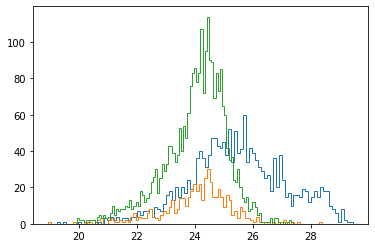

In [74]:
jwst_full_matched_catalogues.fits

In [ ]:
file=open('jwst_catalog.cat','w')
for i in range(len(data_new)):
    print(i)
    file.write(str(data_new[i])+'\n')
file.close()

In [33]:
import csv

with open('MPhys/jwst_train_test1.cat', "w") as my_output_file:
    with open('MPhys/jwst_train_test1.csv', "r") as my_input_file:
        [ my_output_file.write(" ".join(row)+'\n') for row in csv.reader(my_input_file)]
    my_output_file.close()

In [36]:
cat = open('MPhys/jwst_parameter_files/jwst_train_test1.cat','r')

lines = cat.read().splitlines() 
print(lines[1])


 23.423899238400367  23.76071046881758   0.0021424165773759373  0.0031119344765132904  0.5016


In [50]:
import pandas
df = pandas.read_csv('MPhys/jwst_train_test1.csv')
file=open('MPhys/jwst_train_test2.cat','w')
print(len(df))
for line in df:
    
#for i in range(len(df)):
 #   print(line[0])

16889
1
2
2
3
4
1
2
2
3
4
s
